# I would really apprecaite your support by leaving an upvote if you liked my work :)


# **The Client**
XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

# **Project delivery:**
You have been provided with multiple data sets that contains information on 2 cab companies. Each file (data set) provided represents different aspects of the customer profile. XYZ is interested in using your actionable insights to help them identify the right company to make their investment.

The outcome of your delivery will be a presentation to XYZ’s Executive team. This presentation will be judged based on the visuals provided, the quality of your analysis and the value of your recommendations and insights.

# **Data Set:**
You have been provided 4 individual data sets. Time period of data is from 01/01/2016 to 31/12/2018.

Below are the list of datasets which are provided for the analysis:

**Cab_Data.csv** – this file includes details of transaction for 2 cab companies.

**Customer_ID.csv** – this is a mapping table that contains a unique identifier which links the customer’s demographic details.

**Transaction_ID.csv** – this is a mapping table that contains transaction to customer mapping and payment mode.

**City.csv** – this file contains list of US cities, their population and number of cab users.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import scikitplot as skplt
import seaborn as sns
sns.set()

from sklearn import metrics
from sklearn.model_selection import cross_validate

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 20

In [3]:
#importing datasets

cab_df = pd.read_csv("datasets/Cab_Data.csv")
cab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 19.2+ MB


In [4]:
cab_df.isna().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

There are no missing values in this dataset.

In [5]:
cab_df.head()

Transaction ID Date of Travel   Company        City  KM Travelled  \
0        10000011       08.01.16  Pink Cab  ATLANTA GA         30.45   
1        10000012       06.01.16  Pink Cab  ATLANTA GA         28.62   
2        10000013       02.01.16  Pink Cab  ATLANTA GA          9.04   
3        10000014       07.01.16  Pink Cab  ATLANTA GA         33.17   
4        10000015       03.01.16  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776

The `Date of Travel` is of serial number format. Extracting data information from this column.

In [6]:
cab_df['Date of Travel'] = pd.to_datetime(cab_df['Date of Travel'])

In [7]:
cab_df.head()

Transaction ID Date of Travel   Company        City  KM Travelled  \
0        10000011     2016-08-01  Pink Cab  ATLANTA GA         30.45   
1        10000012     2016-06-01  Pink Cab  ATLANTA GA         28.62   
2        10000013     2016-02-01  Pink Cab  ATLANTA GA          9.04   
3        10000014     2016-07-01  Pink Cab  ATLANTA GA         33.17   
4        10000015     2016-03-01  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776

In [8]:
#Import city dataset
city_df = pd.read_csv('datasets/City.csv')
city_df

City   Population      Users
0        NEW YORK NY   8,405,837    302,149 
1         CHICAGO IL   1,955,130    164,468 
2     LOS ANGELES CA   1,595,037    144,132 
3           MIAMI FL   1,339,155     17,675 
4     SILICON VALLEY   1,177,609     27,247 
5      ORANGE COUNTY   1,030,185     12,994 
6       SAN DIEGO CA     959,307     69,995 
7         PHOENIX AZ     943,999      6,133 
8          DALLAS TX     942,908     22,157 
9         ATLANTA GA     814,885     24,701 
10         DENVER CO     754,233     12,421 
11         AUSTIN TX     698,371     14,978 
12        SEATTLE WA     671,238     25,063 
13         TUCSON AZ     631,442      5,712 
14  SAN FRANCISCO CA     629,591    213,609 
15     SACRAMENTO CA     545,776      7,044 
16     PITTSBURGH PA     542,085      3,643 
17     WASHINGTON DC     418,859    127,001 
18      NASHVILLE TN     327,225      9,270 
19         BOSTON MA     248,968     80,021

In [9]:
#checking if Cities in city_df are in cab_df

np.setdiff1d(city_df.City, cab_df.City) #No san Francisco in cab_df dataset

array(['SAN FRANCISCO CA'], dtype=object)

In [10]:
# importing Transaction ID dataset

trans_df = pd.read_csv('datasets/Transaction_ID.csv')
trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423636 entries, 0 to 423635
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  423636 non-null  int64  
 1   Customer ID     423635 non-null  float64
 2   Payment_Mode    423635 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 9.7+ MB


In [11]:
trans_df.head()

Transaction ID  Customer ID Payment_Mode
0        10000011      29290.0         Card
1        10000012      27703.0         Card
2        10000013      28712.0         Cash
3        10000014      28020.0         Cash
4        10000015      27182.0         Card

In [12]:
#Checking for Transaction ID's not in cab_df dataset

len(np.setdiff1d(trans_df['Transaction ID'], cab_df['Transaction ID']))

77658

There are about 77,658 transaction ID's not present in the df1 dataset. These will be dropped when joining trans_df with the df1 dataset

In [13]:
df1 = pd.merge(cab_df, trans_df, on = 'Transaction ID')

In [15]:
# importing customer ID df

cust_df = pd.read_csv('datasets/Customer_ID.csv')
cust_df.head()

Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   Male   27                9237
2        28712   Male   53               11242
3        28020   Male   23               23327
4        27182   Male   33                8536

In [16]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [17]:
# Checking for Customer ID's not in df2 dataset

len(np.setdiff1d(cust_df['Customer ID'], df1['Customer ID']))

3484

Around 3484 Customer ID's are not in the df2 dataset. These will be dropped when cust_df will be joined with the df2 dataset. 

In [18]:
full_df = pd.merge(df1, cust_df, on = 'Customer ID')
full_df.head()

Transaction ID Date of Travel     Company        City  KM Travelled  \
0        10000011     2016-08-01    Pink Cab  ATLANTA GA         30.45   
1        10351127     2018-07-21  Yellow Cab  ATLANTA GA         26.19   
2        10412921     2018-11-23  Yellow Cab  ATLANTA GA         42.55   
3        10000012     2016-06-01    Pink Cab  ATLANTA GA         28.62   
4        10320494     2018-04-21  Yellow Cab  ATLANTA GA         36.38   

   Price Charged  Cost of Trip  Customer ID Payment_Mode Gender  Age  \
0         370.95      313.6350      29290.0         Card   Male   28   
1         598.70      317.4228      29290.0         Cash   Male   28   
2         792.05      597.4020      29290.0         Card   Male   28   
3         358.52      334.8540      27703.0         Card   Male   27   
4         721.10      467.1192      27703.0         Card   Male   27   

   Income (USD/Month)  
0               10813  
1               10813  
2               10813  
3                9237  
4                9237

In [19]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345977 entries, 0 to 345976
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      345977 non-null  int64         
 1   Date of Travel      345977 non-null  datetime64[ns]
 2   Company             345977 non-null  object        
 3   City                345977 non-null  object        
 4   KM Travelled        345977 non-null  float64       
 5   Price Charged       345977 non-null  float64       
 6   Cost of Trip        345977 non-null  float64       
 7   Customer ID         345977 non-null  float64       
 8   Payment_Mode        345977 non-null  object        
 9   Gender              345977 non-null  object        
 10  Age                 345977 non-null  int64         
 11  Income (USD/Month)  345977 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 34.3+ MB


In [20]:
#Checking for NA's

full_df.isna().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

We have joined all datasets and created a master dataset comprising of columns from all of the datasets.

Next, splitting the `City` column in to city and state columns. Fortunately, there already exists a forum online with a list of all US States abbreviations in a list format.https://snipplr.com/view/50728/list-of-us-state-abbreviations 

In [21]:
%%time
US_States = [
    "AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
    "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
    "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
    "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
    "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"
]

state = []
city = []

for i in range(len(full_df)):
    if full_df.City[i].split()[~0] in US_States:
        city.append(full_df.City[i].split(f' {full_df.City[i].split()[~0]}')[0])
        state.append(full_df.City[i].split()[~0])
    else:
        city.append(full_df.City[i])
        state.append(np.nan)

CPU times: user 6.66 s, sys: 25.4 ms, total: 6.69 s
Wall time: 6.69 s


In [22]:
full_df['City'] = city
full_df['State'] = state

full_df.head()

Transaction ID Date of Travel     Company     City  KM Travelled  \
0        10000011     2016-08-01    Pink Cab  ATLANTA         30.45   
1        10351127     2018-07-21  Yellow Cab  ATLANTA         26.19   
2        10412921     2018-11-23  Yellow Cab  ATLANTA         42.55   
3        10000012     2016-06-01    Pink Cab  ATLANTA         28.62   
4        10320494     2018-04-21  Yellow Cab  ATLANTA         36.38   

   Price Charged  Cost of Trip  Customer ID Payment_Mode Gender  Age  \
0         370.95      313.6350      29290.0         Card   Male   28   
1         598.70      317.4228      29290.0         Cash   Male   28   
2         792.05      597.4020      29290.0         Card   Male   28   
3         358.52      334.8540      27703.0         Card   Male   27   
4         721.10      467.1192      27703.0         Card   Male   27   

   Income (USD/Month) State  
0               10813    GA  
1               10813    GA  
2               10813    GA  
3                9237    GA  
4                9237    GA

In [23]:
print(full_df.City.unique())
print()
full_df.State.unique()

['ATLANTA' 'AUSTIN' 'BOSTON' 'CHICAGO' 'DALLAS' 'DENVER' 'LOS ANGELES'
 'MIAMI' 'NASHVILLE' 'NEW YORK' 'ORANGE COUNTY' 'PHOENIX' 'PITTSBURGH'
 'SACRAMENTO' 'SAN DIEGO' 'SEATTLE' 'SILICON VALLEY' 'TUCSON' 'WASHINGTON']



array(['GA', 'TX', 'MA', 'IL', 'CO', 'CA', 'FL', 'TN', 'NY', nan, 'AZ',
       'PA', 'WA', 'DC'], dtype=object)

In [24]:
full_df.isna().sum()

Transaction ID            0
Date of Travel            0
Company                   0
City                      0
KM Travelled              0
Price Charged             0
Cost of Trip              0
Customer ID               0
Payment_Mode              0
Gender                    0
Age                       0
Income (USD/Month)        0
State                 12015
dtype: int64

There are about 12015 observations with missing states columns. Checking which cities have missing states. 

In [25]:
full_df[full_df.State.isna()]['City'].unique()

array(['ORANGE COUNTY', 'SILICON VALLEY'], dtype=object)

Since both Orange County and Silicon Valley are located within the State of California, I will impute the missing values in the `State`column belonging to these cities as 'CA' (California)

In [26]:
full_df.fillna('CA', inplace = True)

In [27]:
full_df.isna().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
State                 0
dtype: int64

In [28]:
#Checking for duplicated observation or columns
full_df.duplicated().sum() #None

0

In [29]:
#Replacing spaces in columns names with _

full_df.columns = [col.strip().replace(' ', '_').lower() for col in full_df.columns]
print(full_df.columns)
full_df.rename(columns = {'income_(usd/month)' : 'cust_income', 
                          'date_of_travel' : 'travel_date'}, inplace = True)

Index(['transaction_id', 'date_of_travel', 'company', 'city', 'km_travelled',
       'price_charged', 'cost_of_trip', 'customer_id', 'payment_mode',
       'gender', 'age', 'income_(usd/month)', 'state'],
      dtype='object')


In [30]:
#Sorting the data based on date of travel and transaction ID.

full_df.sort_values(['travel_date', 'transaction_id'], ignore_index=True, inplace = True)

In [31]:
full_df

transaction_id travel_date     company         city  km_travelled  \
0             10004271  2016-01-02    Pink Cab       BOSTON         38.61   
1             10004303  2016-01-02    Pink Cab      CHICAGO         25.68   
2             10004308  2016-01-02    Pink Cab       DALLAS         22.26   
3             10004314  2016-01-02    Pink Cab       DENVER         31.59   
4             10004335  2016-01-02    Pink Cab  LOS ANGELES         25.44   
...                ...         ...         ...          ...           ...   
345972        10411495  2018-12-11  Yellow Cab   WASHINGTON         11.90   
345973        10411582  2018-12-11  Yellow Cab   WASHINGTON         31.92   
345974        10411591  2018-12-11  Yellow Cab   WASHINGTON         30.07   
345975        10411595  2018-12-11  Yellow Cab   WASHINGTON          2.06   
345976        10411596  2018-12-11  Yellow Cab   WASHINGTON         26.73   

        price_charged  cost_of_trip  customer_id payment_mode  gender  age  \
0              358.05      405.4050      59321.0         Cash    Male   45   
1              347.96      264.5040       4036.0         Cash    Male   40   
2              208.20      249.3120      24643.0         Card    Male   26   
3              269.59      353.8080      31798.0         Cash    Male   32   
4              310.69      292.5600       6194.0         Cash    Male   37   
...               ...           ...          ...          ...     ...  ...   
345972         160.24      154.2240      52841.0         Cash    Male   49   
345973         429.81      444.3264      51044.0         Cash    Male   30   
345974         400.54      375.2736      52373.0         Cash    Male   63   
345975          31.02       28.6752      51652.0         Card  Female   24   
345976         398.63      327.1752      51599.0         Card    Male   60   

        cust_income state  
0             22849    MA  
1              9346    IL  
2             18763    TX  
3              8807    CO  
4             18824    CA  
...             ...   ...  
345972         6667    DC  
345973        13747    DC  
345974         5134    DC  
345975         8417    DC  
345976         7787    DC  

[345977 rows x 13 columns]

In [32]:
#checking for any duplicated observations

print(cust_df.duplicated().sum())
print(trans_df.duplicated().sum())
print(cab_df.duplicated().sum())

#None

0
0
0


##### Now the dataset is complete and ready for EDA

In [ ]:
# full_df.to_csv('full_df.csv', index = False)

# EDA

In [33]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


Both `population` and `users` columns are of object data type. Converting these columns to numeric

In [34]:
city_df.Population[0], city_df.Users[0]
#There are commas inside figures in population and users.

(' 8,405,837 ', ' 302,149 ')

In [35]:
city_df.Population = [city_df.Population[i].replace(",", "") for i in range(len(city_df))]
city_df.Users = [city_df.Users[i].replace(",", "") for i in range(len(city_df))]

In [36]:
city_df

City Population     Users
0        NEW YORK NY   8405837    302149 
1         CHICAGO IL   1955130    164468 
2     LOS ANGELES CA   1595037    144132 
3           MIAMI FL   1339155     17675 
4     SILICON VALLEY   1177609     27247 
5      ORANGE COUNTY   1030185     12994 
6       SAN DIEGO CA    959307     69995 
7         PHOENIX AZ    943999      6133 
8          DALLAS TX    942908     22157 
9         ATLANTA GA    814885     24701 
10         DENVER CO    754233     12421 
11         AUSTIN TX    698371     14978 
12        SEATTLE WA    671238     25063 
13         TUCSON AZ    631442      5712 
14  SAN FRANCISCO CA    629591    213609 
15     SACRAMENTO CA    545776      7044 
16     PITTSBURGH PA    542085      3643 
17     WASHINGTON DC    418859    127001 
18      NASHVILLE TN    327225      9270 
19         BOSTON MA    248968     80021

In [37]:
city_df.Population[0]

' 8405837 '

In [38]:
city_df.Population = city_df.Population.astype('int64')
city_df.Users = city_df.Users.astype('int64')

In [39]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     int64 
 2   Users       20 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 608.0+ bytes


In [40]:
US_States = [
    "AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
    "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
    "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
    "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
    "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"
]

state = []
city = []

for i in range(len(city_df)):
    if city_df.City[i].split()[~0] in US_States:
        city.append(city_df.City[i].split(f' {city_df.City[i].split()[~0]}')[0])
        state.append(city_df.City[i].split()[~0])
    else:
        city.append(city_df.City[i])
        state.append(np.nan)
        
city_df.City = city
city_df['state'] = state

In [41]:
city_df

City  Population   Users state
0         NEW YORK     8405837  302149    NY
1          CHICAGO     1955130  164468    IL
2      LOS ANGELES     1595037  144132    CA
3            MIAMI     1339155   17675    FL
4   SILICON VALLEY     1177609   27247   NaN
5    ORANGE COUNTY     1030185   12994   NaN
6        SAN DIEGO      959307   69995    CA
7          PHOENIX      943999    6133    AZ
8           DALLAS      942908   22157    TX
9          ATLANTA      814885   24701    GA
10          DENVER      754233   12421    CO
11          AUSTIN      698371   14978    TX
12         SEATTLE      671238   25063    WA
13          TUCSON      631442    5712    AZ
14   SAN FRANCISCO      629591  213609    CA
15      SACRAMENTO      545776    7044    CA
16      PITTSBURGH      542085    3643    PA
17      WASHINGTON      418859  127001    DC
18       NASHVILLE      327225    9270    TN
19          BOSTON      248968   80021    MA

In [42]:
city_df.fillna('CA', inplace = True)

### Visualizing Demographics

I will visualize the total population of both users and non-users of cab services by state.

In [43]:
city_df.groupby(['state', 'City']).mean()[['Population', 'Users']]

Population     Users
state City                                
AZ    PHOENIX           943999.0    6133.0
      TUCSON            631442.0    5712.0
CA    LOS ANGELES      1595037.0  144132.0
      ORANGE COUNTY    1030185.0   12994.0
      SACRAMENTO        545776.0    7044.0
      SAN DIEGO         959307.0   69995.0
      SAN FRANCISCO     629591.0  213609.0
      SILICON VALLEY   1177609.0   27247.0
CO    DENVER            754233.0   12421.0
DC    WASHINGTON        418859.0  127001.0
FL    MIAMI            1339155.0   17675.0
GA    ATLANTA           814885.0   24701.0
IL    CHICAGO          1955130.0  164468.0
MA    BOSTON            248968.0   80021.0
NY    NEW YORK         8405837.0  302149.0
PA    PITTSBURGH        542085.0    3643.0
TN    NASHVILLE         327225.0    9270.0
TX    AUSTIN            698371.0   14978.0
      DALLAS            942908.0   22157.0
WA    SEATTLE           671238.0   25063.0

In [44]:
demograph = city_df.groupby(['state', 'City']).mean()[['Population', 'Users']].sum(level = 0)

In [45]:
demograph['non-users'] = demograph['Population'] - demograph['Users']

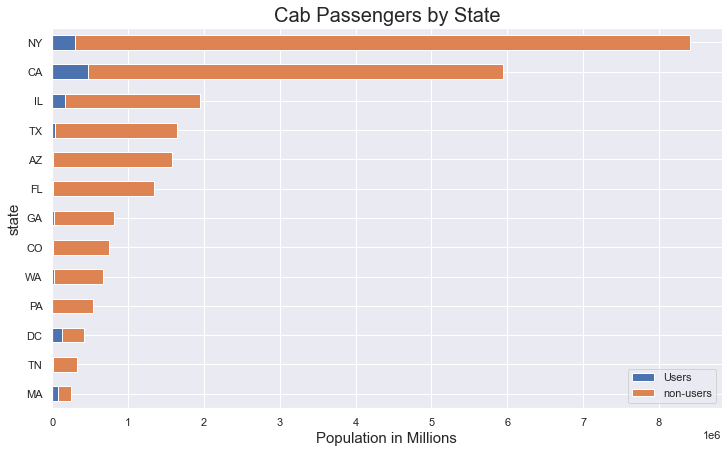

In [46]:
demograph.sort_values(['Population', 'Users'])[['Users', 'non-users']].\
plot(kind = 'barh', stacked = True, figsize = (12, 7), title = "Cab Passengers by State");

plt.xlabel("Population in Millions");

The state of New York has the highest population of approximately 8.5 million followed California (around 5.3 million). Both of these states also have the highest number of users, followed by Illinois, DC and Massachusetts.  

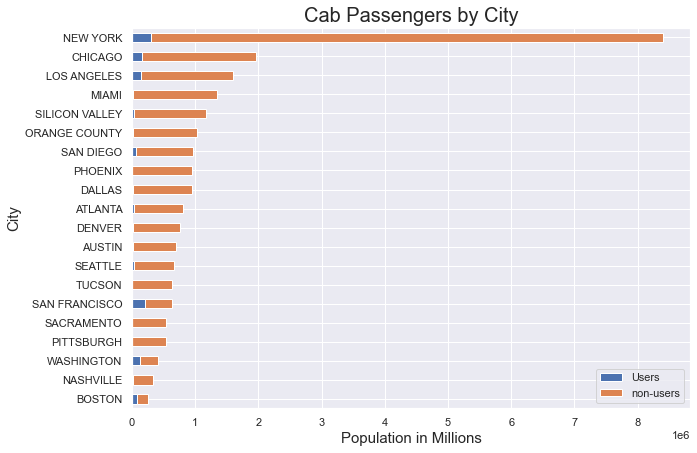

In [47]:
#Visualizing at City level

city_demog = city_df.groupby(['City']).mean()[['Population', 'Users']].sum(level = 0)

city_demog['non-users'] = city_demog['Population'] - city_demog['Users']

city_demog.sort_values(['Population', 'Users'])[['Users', 'non-users']].\
plot(kind = 'barh', stacked = True, figsize = (10, 7), title = "Cab Passengers by City");

plt.xlabel("Population in Millions");

New York city has the highest number of users followed by Chicago, Los Angeles and Washington.

Proportion of Total Male Customers: 57.30 %
Proportion of Total Female Customers: 42.70 %


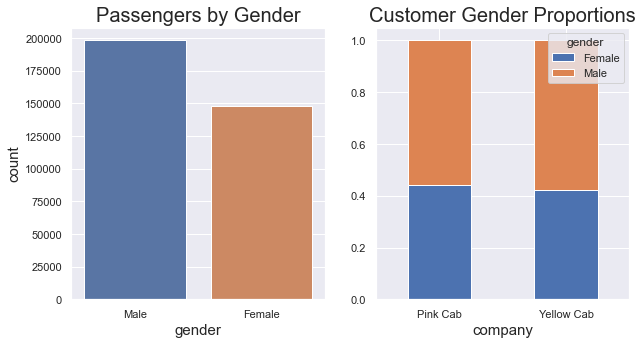

In [48]:
#Gender
print(f'Proportion of Total Male Customers: {full_df.gender.value_counts(normalize = True)[0]*100:.2f} %')
print(f'Proportion of Total Female Customers: {full_df.gender.value_counts(normalize = True)[1]*100:.2f} %')

fig, ax = plt.subplots(1,2, figsize = (10,5))

sns.countplot(full_df.gender, ax = ax[0]).set_title("Passengers by Gender");

pd.crosstab(index = full_df.company, columns = full_df.gender, normalize = 'index').\
plot(kind = 'bar', stacked = True, ax = ax[1], rot = 0, title = "Customer Gender Proportions");

Proportion of Male passengers are higher than female passengers. But both companies have the same distribution of passengers by gender.

# Visualizing Trips

In [49]:
#Extracting date info from travel_date

full_df['year'] = full_df['travel_date'].dt.year
full_df['month'] = full_df.travel_date.dt.month
full_df['date'] = full_df.travel_date.dt.day
full_df['day_of_week'] = full_df.travel_date.dt.dayofweek

In [50]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345977 entries, 0 to 345976
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   transaction_id  345977 non-null  int64         
 1   travel_date     345977 non-null  datetime64[ns]
 2   company         345977 non-null  object        
 3   city            345977 non-null  object        
 4   km_travelled    345977 non-null  float64       
 5   price_charged   345977 non-null  float64       
 6   cost_of_trip    345977 non-null  float64       
 7   customer_id     345977 non-null  float64       
 8   payment_mode    345977 non-null  object        
 9   gender          345977 non-null  object        
 10  age             345977 non-null  int64         
 11  cust_income     345977 non-null  int64         
 12  state           345977 non-null  object        
 13  year            345977 non-null  int64         
 14  month           345977 non-null  int

In [51]:
full_df

transaction_id travel_date     company         city  km_travelled  \
0             10004271  2016-01-02    Pink Cab       BOSTON         38.61   
1             10004303  2016-01-02    Pink Cab      CHICAGO         25.68   
2             10004308  2016-01-02    Pink Cab       DALLAS         22.26   
3             10004314  2016-01-02    Pink Cab       DENVER         31.59   
4             10004335  2016-01-02    Pink Cab  LOS ANGELES         25.44   
...                ...         ...         ...          ...           ...   
345972        10411495  2018-12-11  Yellow Cab   WASHINGTON         11.90   
345973        10411582  2018-12-11  Yellow Cab   WASHINGTON         31.92   
345974        10411591  2018-12-11  Yellow Cab   WASHINGTON         30.07   
345975        10411595  2018-12-11  Yellow Cab   WASHINGTON          2.06   
345976        10411596  2018-12-11  Yellow Cab   WASHINGTON         26.73   

        price_charged  cost_of_trip  customer_id payment_mode  gender  age  \
0              358.05      405.4050      59321.0         Cash    Male   45   
1              347.96      264.5040       4036.0         Cash    Male   40   
2              208.20      249.3120      24643.0         Card    Male   26   
3              269.59      353.8080      31798.0         Cash    Male   32   
4              310.69      292.5600       6194.0         Cash    Male   37   
...               ...           ...          ...          ...     ...  ...   
345972         160.24      154.2240      52841.0         Cash    Male   49   
345973         429.81      444.3264      51044.0         Cash    Male   30   
345974         400.54      375.2736      52373.0         Cash    Male   63   
345975          31.02       28.6752      51652.0         Card  Female   24   
345976         398.63      327.1752      51599.0         Card    Male   60   

        cust_income state  year  month  date  day_of_week  
0             22849    MA  2016      1     2            5  
1              9346    IL  2016      1     2            5  
2             18763    TX  2016      1     2            5  
3              8807    CO  2016      1     2            5  
4             18824    CA  2016      1     2            5  
...             ...   ...   ...    ...   ...          ...  
345972         6667    DC  2018     12    11            1  
345973        13747    DC  2018     12    11            1  
345974         5134    DC  2018     12    11            1  
345975         8417    DC  2018     12    11            1  
345976         7787    DC  2018     12    11            1  

[345977 rows x 17 columns]

In [52]:
trip = full_df.groupby(['travel_date', 'company']).size().reset_index().rename(columns = {0 : 'count'})

#full_df.travel_date = full_df.travel_date.dt.date
trip

travel_date     company  count
0     2016-01-02    Pink Cab     13
1     2016-01-02  Yellow Cab     86
2     2016-01-03    Pink Cab     17
3     2016-01-03  Yellow Cab     88
4     2016-01-04    Pink Cab     30
...          ...         ...    ...
2145  2018-12-09  Yellow Cab    180
2146  2018-12-10    Pink Cab    225
2147  2018-12-10  Yellow Cab    622
2148  2018-12-11    Pink Cab     67
2149  2018-12-11  Yellow Cab    204

[2150 rows x 3 columns]

In [53]:
trip["day"] = trip.travel_date.dt.day_name()
trip

travel_date     company  count       day
0     2016-01-02    Pink Cab     13  Saturday
1     2016-01-02  Yellow Cab     86  Saturday
2     2016-01-03    Pink Cab     17    Sunday
3     2016-01-03  Yellow Cab     88    Sunday
4     2016-01-04    Pink Cab     30    Monday
...          ...         ...    ...       ...
2145  2018-12-09  Yellow Cab    180    Sunday
2146  2018-12-10    Pink Cab    225    Monday
2147  2018-12-10  Yellow Cab    622    Monday
2148  2018-12-11    Pink Cab     67   Tuesday
2149  2018-12-11  Yellow Cab    204   Tuesday

[2150 rows x 4 columns]

##### Distribution of number of trips

In [54]:
#Assigning Colors for companies
palette = ['#d965a4', '#ffc400']

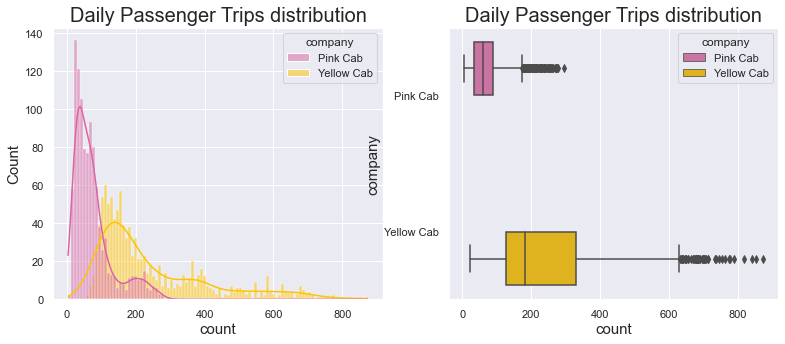

In [55]:
fig, ax = plt.subplots(1,2, figsize = (13,5))
sns.histplot(x = 'count', hue = 'company', data = trip, kde = True, palette = palette, 
             bins = 100, ax = ax[0]).set_title("Daily Passenger Trips distribution");

sns.boxplot(x = 'count', y = 'company', data = trip, hue = 'company', palette = palette, 
            ax = ax[1]).set_title("Daily Passenger Trips distribution");

The above plots depicts the distribution of daily trips by both Cab companies. $\color{yellow}{\text{Yellow Cab}}$ has a higher median trips compared to $\color{violet}{\text{Pink Cab}}$. Both distributions are skewed to the right, signifying that greater number of trips on some days are rarer. 

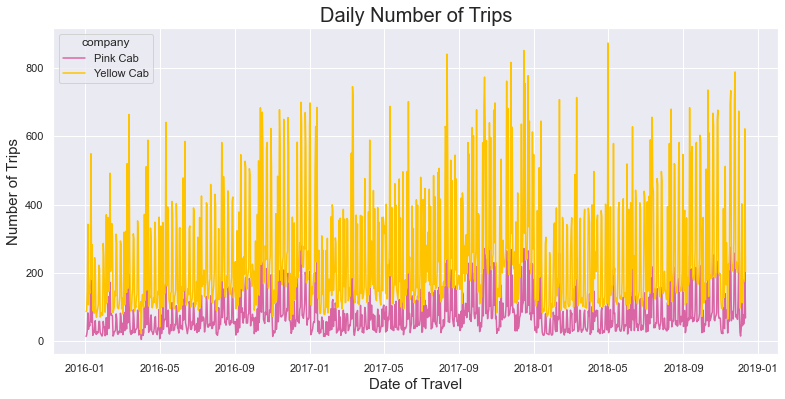

In [56]:
plt.figure(figsize = (13,6))
sns.lineplot(x = 'travel_date', y = 'count', data = trip, hue = 'company', 
             palette = palette);
plt.title('Daily Number of Trips');
plt.xlabel('Date of Travel');
plt.ylabel('Number of Trips');

The above plots displays daily trips made by both Cab companies from beginning of 2016 till the end of  2018. There is a clear seasonality on a weekly, monthly and yearly level for both Cab companies. Both Cab companies follows the same patterns. <br>
<br>
On a monthly level, there is a clear upward trend. On new year, the daily trips dips down to the lowest again. But on a yearly level, the trend seems to be almost uniform.<br>
<br>
$\color{yellow}{\text{Yellow Cab}}$ makes significantly more trips on any given day compared to $\color{violet}{\text{Pink Cab}}$. The highest reported trips for both Cab companies was on 5th of January, 2018.

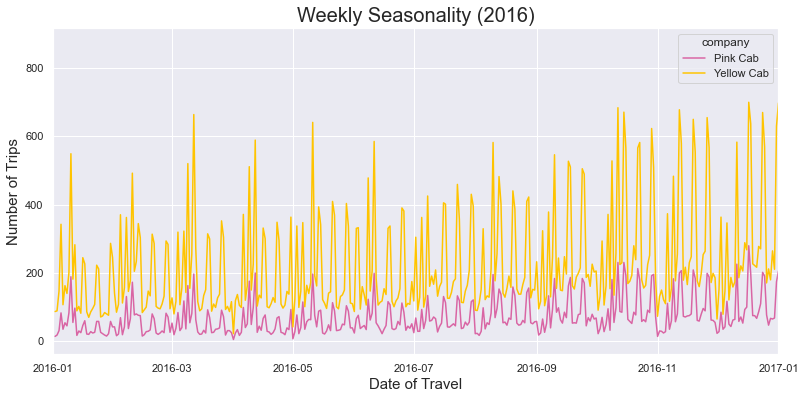

In [57]:
plt.figure(figsize = (13,6))
ax = sns.lineplot(x = 'travel_date', y = 'count', data = trip, hue = 'company', 
             palette = palette);

plt.title('Weekly Seasonality (2016)');
plt.xlabel('Date of Travel');
plt.ylabel('Number of Trips');
plt.xlim(16801, 17167);

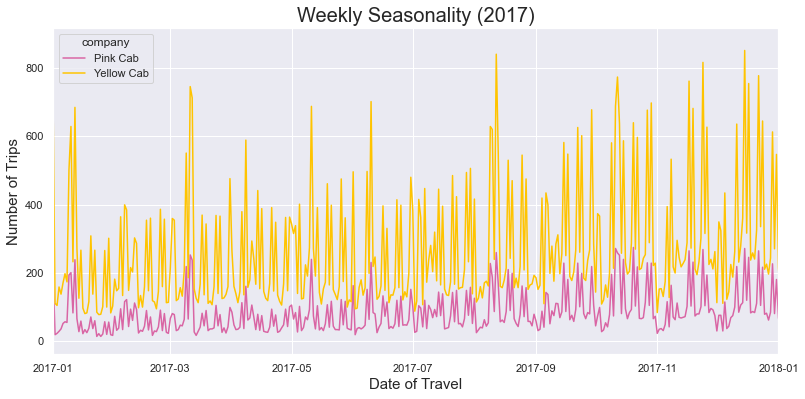

In [58]:
plt.figure(figsize = (13,6))
sns.lineplot(x = 'travel_date', y = 'count', data = trip, hue = 'company', 
             palette = palette);

plt.title('Weekly Seasonality (2017)');
plt.xlabel('Date of Travel');
plt.ylabel('Number of Trips');
plt.xlim(17167, 17532);


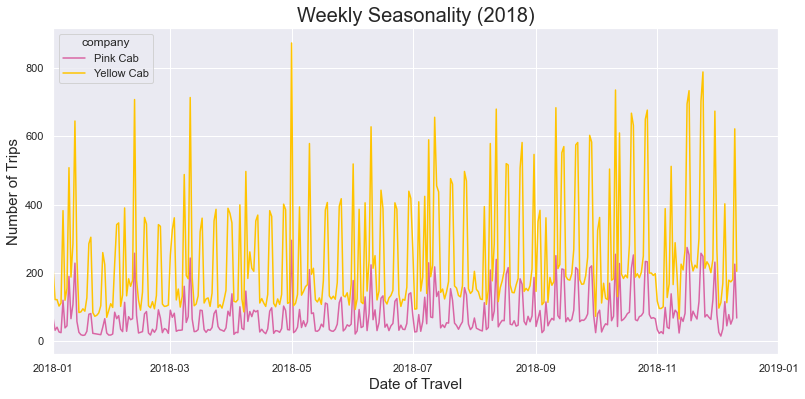

In [59]:
plt.figure(figsize = (13,6))
sns.lineplot(x = 'travel_date', y = 'count', data = trip, hue = 'company', 
             palette = palette);

plt.title('Weekly Seasonality (2018)');
plt.xlabel('Date of Travel');
plt.ylabel('Number of Trips');
plt.xlim(17532, 17897);

For the year 2017, the seasonality pattern is different compared to both 2016 and 2018.

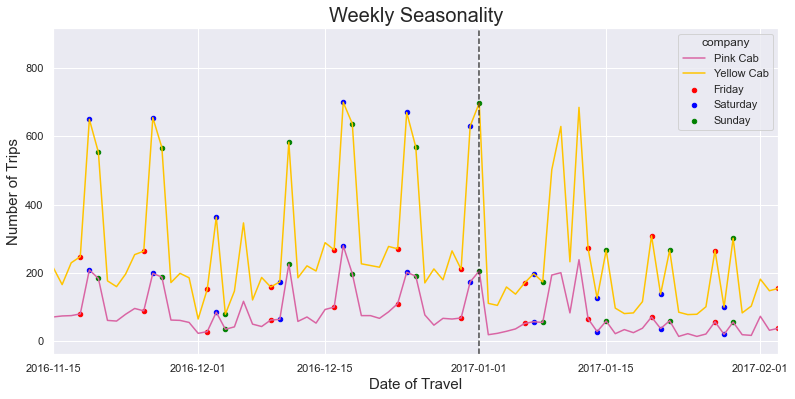

In [60]:
#Selecting range of months
#2016 to 2017

plt.figure(figsize = (13,6))

ax = sns.lineplot(x = 'travel_date', y = 'count', data = trip, hue = 'company', 
             palette = palette);

plt.axvline(x = 17167, color = 'k', alpha = 0.8, linestyle = "--"); #To mark new year

for day, color in zip(['Friday', 'Saturday', 'Sunday'], ['red', 'blue', 'green']):
    trip.query(f"day == '{day}'")[['travel_date', 'count']].\
    plot.scatter(x = 'travel_date', y = 'count', ax = ax, label = f'{day}', color = color);


plt.title('Weekly Seasonality');
plt.xlabel('Date of Travel');
plt.ylabel('Number of Trips');
plt.xlim(17120, 17200);

On any given month, there is a weekly seasonality where the number of trips are especially high during the weekends (Saturday and Sunday) for the year 2016.<br>
<br>
Interestingly, for the year 2017, the seasonality starts to change. There is an increase in number of rides during Friday, then it dips down on Saturday and then increases again during Sunday. This pattern is observed for both Cab companies. <br>

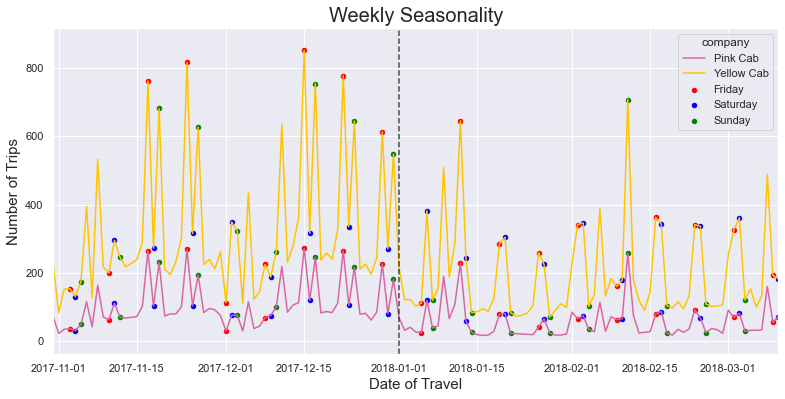

In [61]:
#2017 to 2018

plt.figure(figsize = (13,6))
ax = sns.lineplot(x = 'travel_date', y = 'count', data = trip, hue = 'company', 
             palette = palette);

plt.axvline(x = 17532, color = 'k', alpha = 0.8, linestyle = "--"); #To mark new year

for day, color in zip(['Friday', 'Saturday', 'Sunday'], ['red', 'blue', 'green']):
    trip.query(f"day == '{day}'")[['travel_date', 'count']].\
    plot.scatter(x = 'travel_date', y = 'count', ax = ax, label = f'{day}', color = color);

plt.title('Weekly Seasonality');
plt.xlabel('Date of Travel');
plt.ylabel('Number of Trips');
plt.xlim(17470, 17600);

From 2017 to 2018, the pattern changes once again, this time, there is a peak of riders during Friday, then Saturday but then dips to down to low during Sunday. <br>

Let's look closely into number of trips during the 5th January 2018.

In [62]:
daily_trip_city = full_df.groupby(['travel_date', 'city', 'company']).size().reset_index().\
                                                            rename(columns = {0 : 'count'})

daily_trip_city

travel_date            city     company  count
0      2016-01-02         ATLANTA  Yellow Cab      2
1      2016-01-02          AUSTIN  Yellow Cab      1
2      2016-01-02          BOSTON    Pink Cab      1
3      2016-01-02          BOSTON  Yellow Cab      6
4      2016-01-02         CHICAGO    Pink Cab      4
...           ...             ...         ...    ...
32138  2018-12-11  SILICON VALLEY    Pink Cab      1
32139  2018-12-11          TUCSON    Pink Cab      1
32140  2018-12-11          TUCSON  Yellow Cab      1
32141  2018-12-11      WASHINGTON    Pink Cab      6
32142  2018-12-11      WASHINGTON  Yellow Cab     26

[32143 rows x 4 columns]

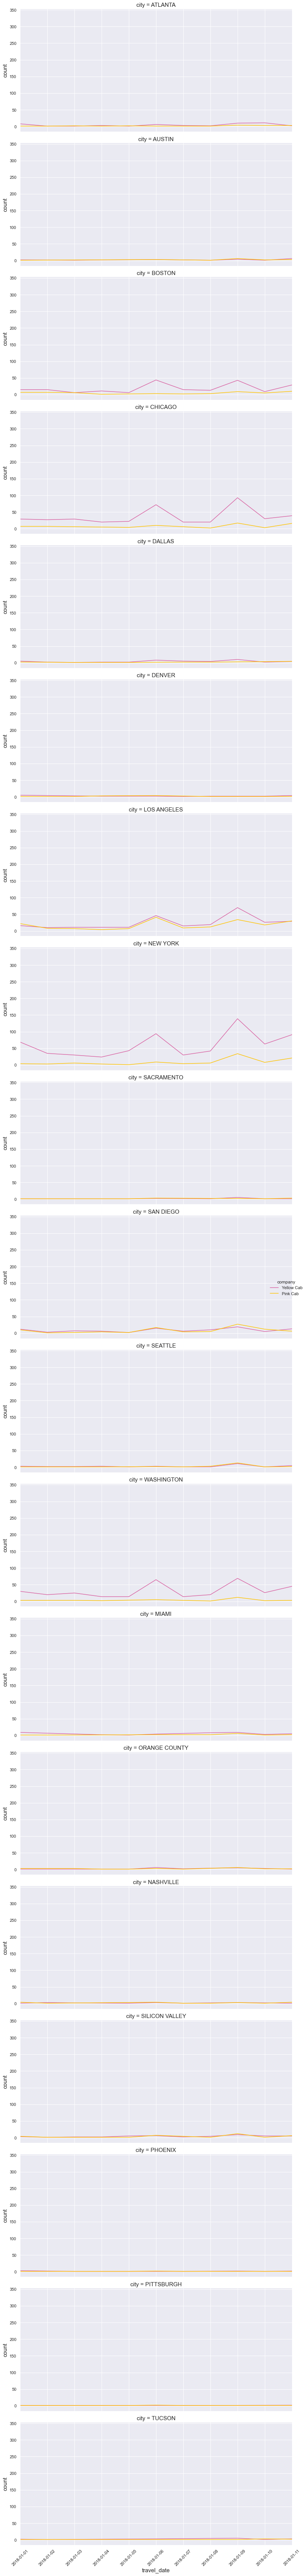

In [63]:
sns.relplot(x = 'travel_date', y = 'count', row = 'city', hue = 'company', 
            palette = palette, data = daily_trip_city, kind = 'line', aspect = 2);

plt.xlim(17532, 17542);
plt.xticks(rotation = 45);
plt.tight_layout();

The highest spike in the number of rides can be noticed in New York, followed by Chicago, Washington and Los Angeles. It is unknown why there was a spike in number of rides on this particular day. There was a blizzard storm in New York during the first week of January on 2018. Unfortunately, I wasn't able to find any suitable weather datasets during this time period for any of the states. 

Next, I will visualize the data on a Month level basis.

In [64]:
#Aggregating at a month level to visualize month seasonality

month_trip = full_df.groupby(['year', 'month', 'company']).size().reset_index().\
                                                    rename(columns = {0:'count'})
month_trip

year  month     company  count
0   2016      1    Pink Cab   1290
1   2016      1  Yellow Cab   4806
2   2016      2    Pink Cab   1467
3   2016      2  Yellow Cab   5578
4   2016      3    Pink Cab   1660
..   ...    ...         ...    ...
67  2018     10  Yellow Cab   9096
68  2018     11    Pink Cab   2945
69  2018     11  Yellow Cab   8889
70  2018     12    Pink Cab    793
71  2018     12  Yellow Cab   2517

[72 rows x 4 columns]

In [65]:
month_trip['month_level'] = month_trip['year'].astype('str') + "-" + month_trip['month'].astype('str')
month_trip

year  month     company  count month_level
0   2016      1    Pink Cab   1290      2016-1
1   2016      1  Yellow Cab   4806      2016-1
2   2016      2    Pink Cab   1467      2016-2
3   2016      2  Yellow Cab   5578      2016-2
4   2016      3    Pink Cab   1660      2016-3
..   ...    ...         ...    ...         ...
67  2018     10  Yellow Cab   9096     2018-10
68  2018     11    Pink Cab   2945     2018-11
69  2018     11  Yellow Cab   8889     2018-11
70  2018     12    Pink Cab    793     2018-12
71  2018     12  Yellow Cab   2517     2018-12

[72 rows x 5 columns]

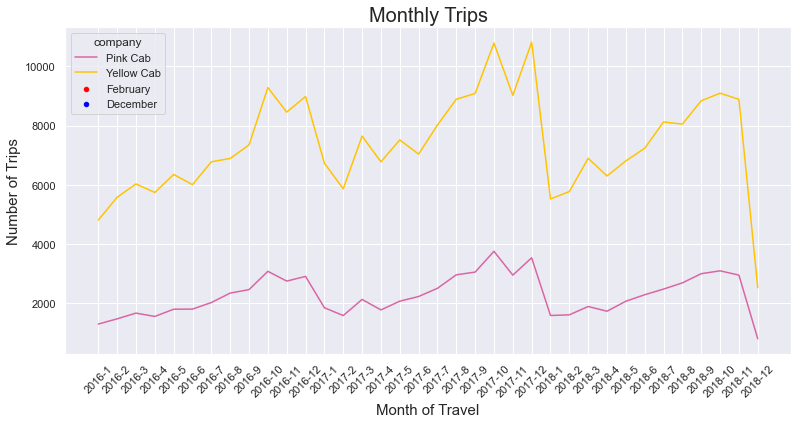

In [66]:
plt.figure(figsize = (13,6))
ax = sns.lineplot(x = 'month_level', y = 'count', data = month_trip, hue = 'company', 
             palette = palette);

for month, name, color in zip([2,12], ['February', 'December'], ['red', 'blue']):
    month_trip.query(f"month == '{month}'")[['month_level', 'count']].\
    plot.scatter(x = 'month_level', y = 'count', ax = ax, label = f'{name}', color = color);

plt.xticks(rotation = 45)
plt.title('Monthly Trips');
plt.xlabel('Month of Travel');
plt.ylabel('Number of Trips');

When aggregating trips at a monthly level, again, there is a clear seasonality. The number of trips at the month of February is the lowest and the number of trips at the month of December is the highest for all the years. For both Cab companies, there is a slight upward trend  throughout the years.

##### Next, I will visualize monthly trips per city for both Cab companies

In [67]:
city_trips_month = full_df.groupby(['year', 'month', 'city', 'company']).size().\
                                    reset_index().rename(columns = {0:'count'})

city_trips_month['month_level'] = city_trips_month['year'].astype('str') + "_" + \
                                                city_trips_month['month'].astype('str')

city_trips_month

year  month            city     company  count month_level
0     2016      1         ATLANTA    Pink Cab     24      2016_1
1     2016      1         ATLANTA  Yellow Cab    102      2016_1
2     2016      1          AUSTIN    Pink Cab     22      2016_1
3     2016      1          AUSTIN  Yellow Cab     40      2016_1
4     2016      1          BOSTON    Pink Cab     96      2016_1
...    ...    ...             ...         ...    ...         ...
1363  2018     12  SILICON VALLEY  Yellow Cab     39     2018_12
1364  2018     12          TUCSON    Pink Cab      8     2018_12
1365  2018     12          TUCSON  Yellow Cab     10     2018_12
1366  2018     12      WASHINGTON    Pink Cab     33     2018_12
1367  2018     12      WASHINGTON  Yellow Cab    366     2018_12

[1368 rows x 6 columns]

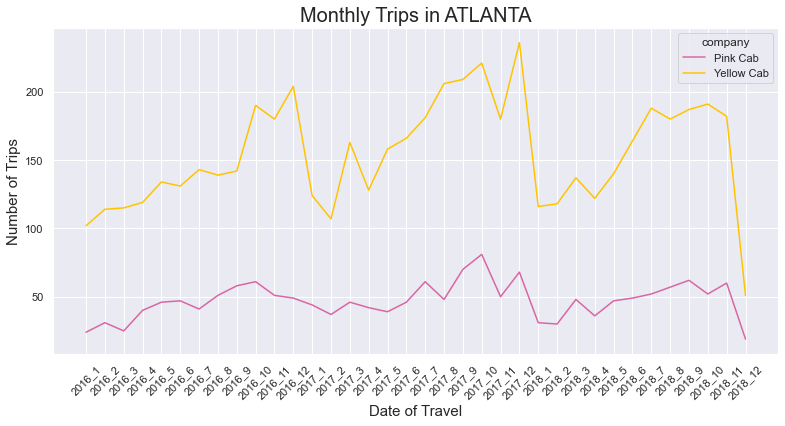

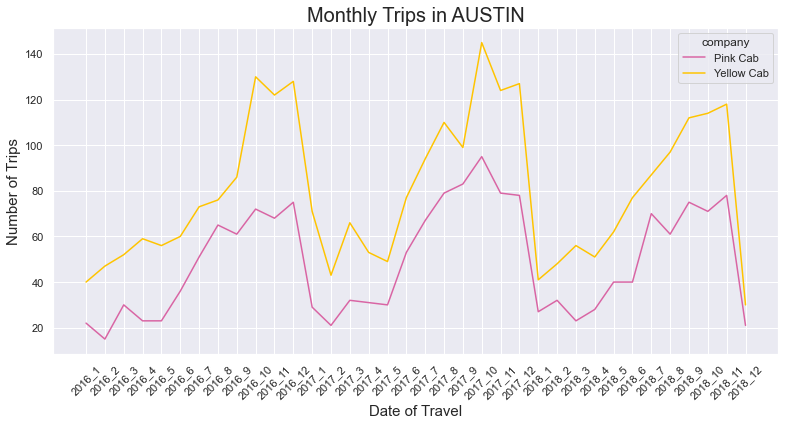

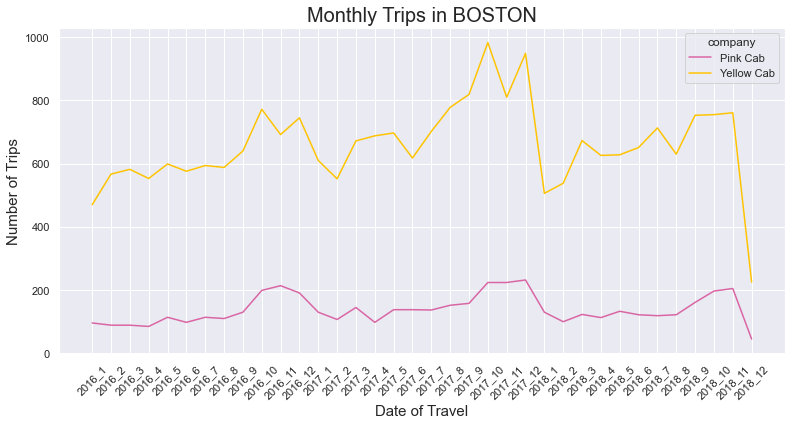

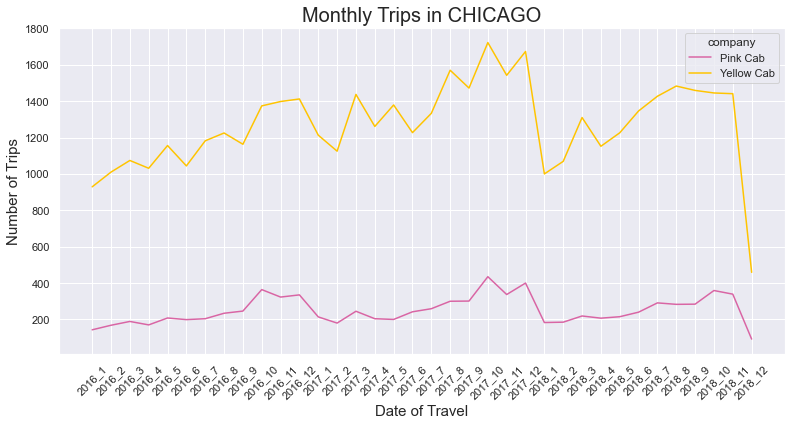

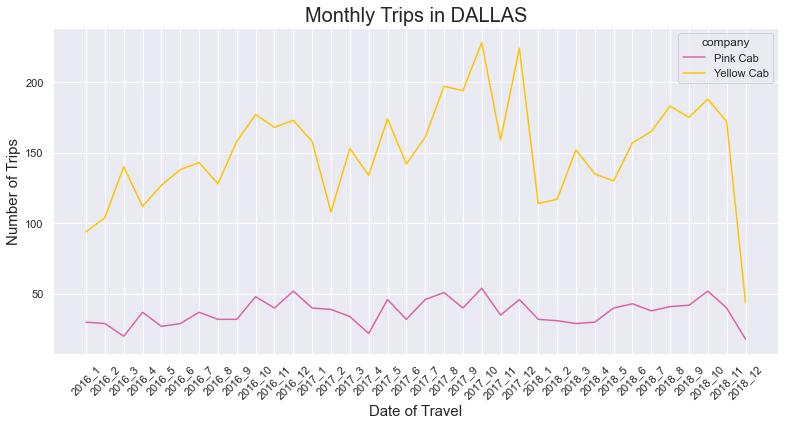

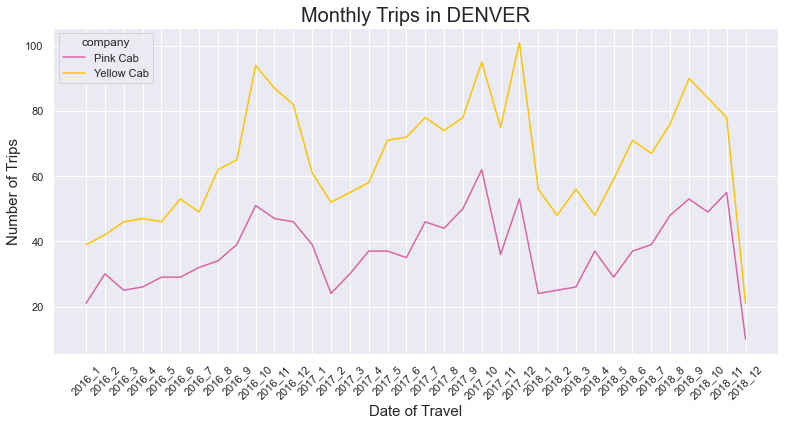

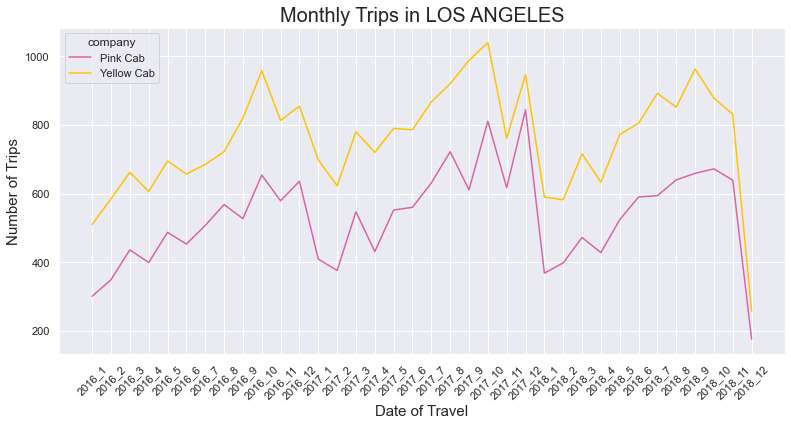

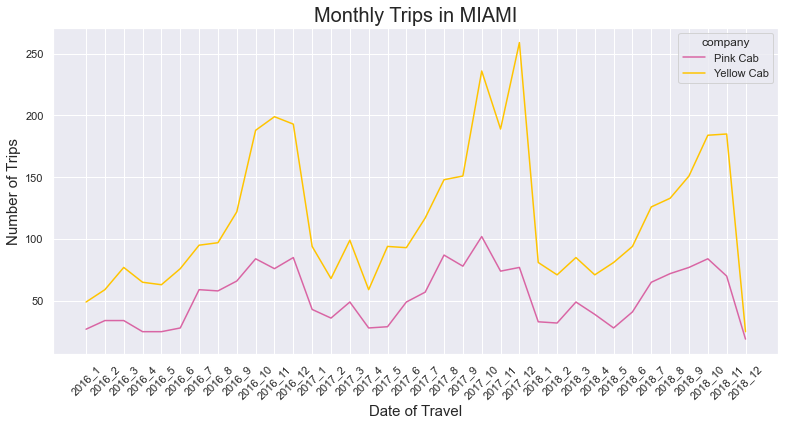

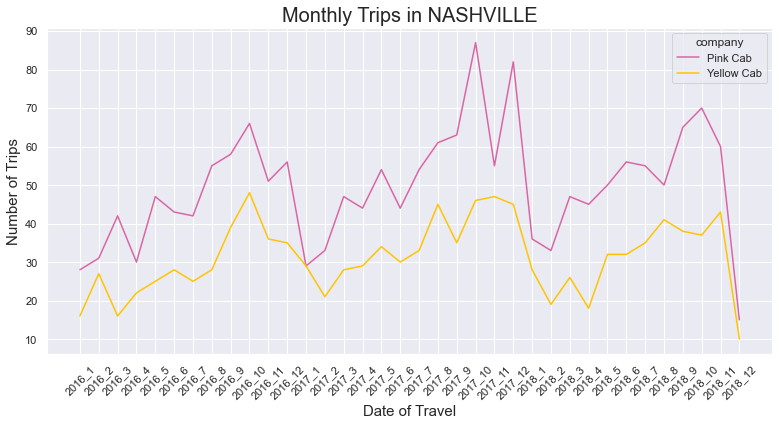

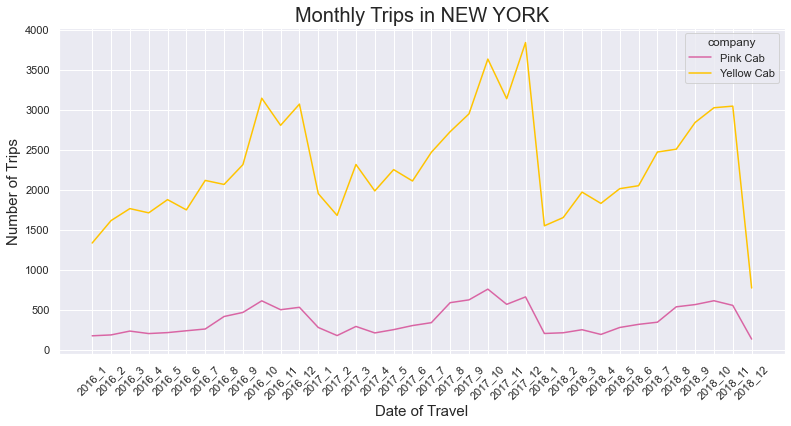

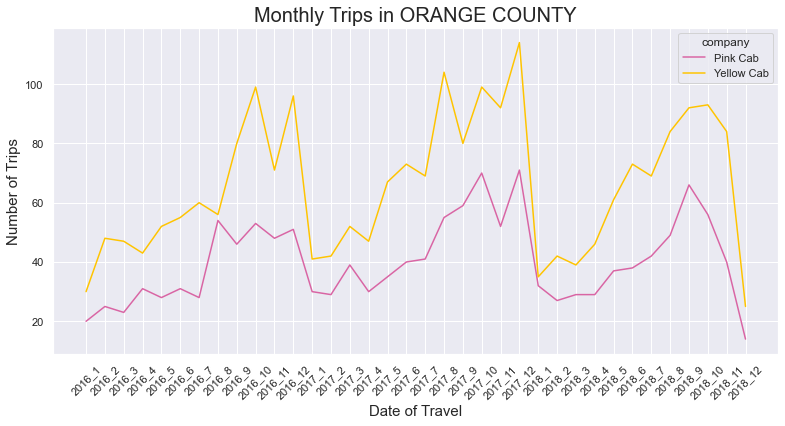

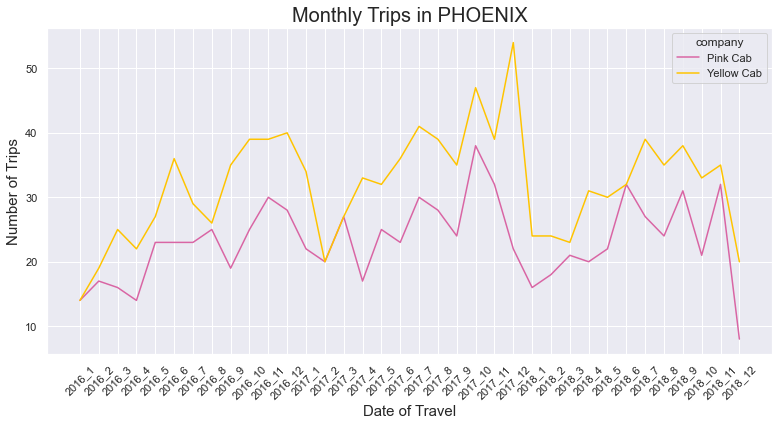

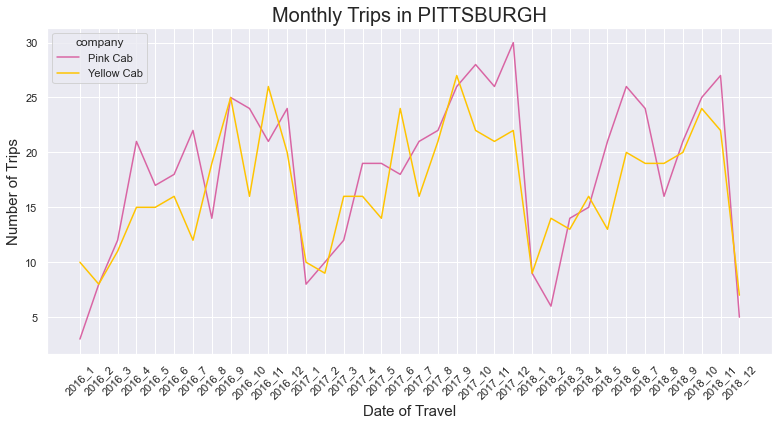

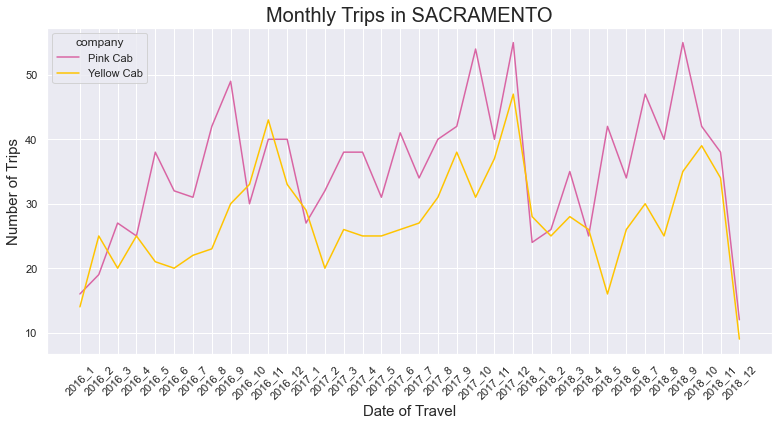

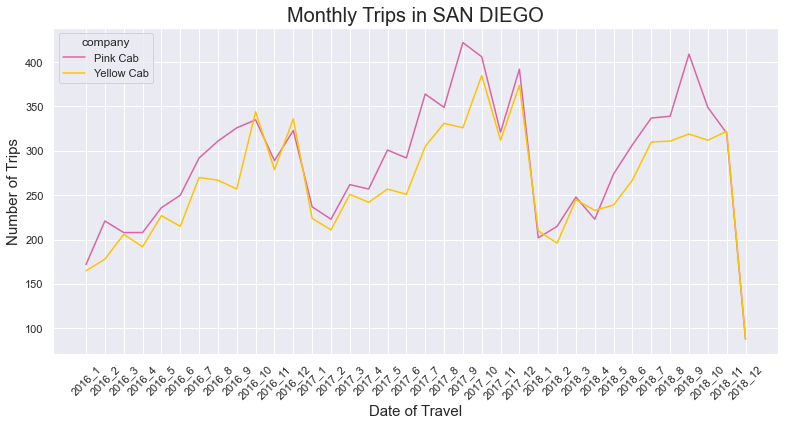

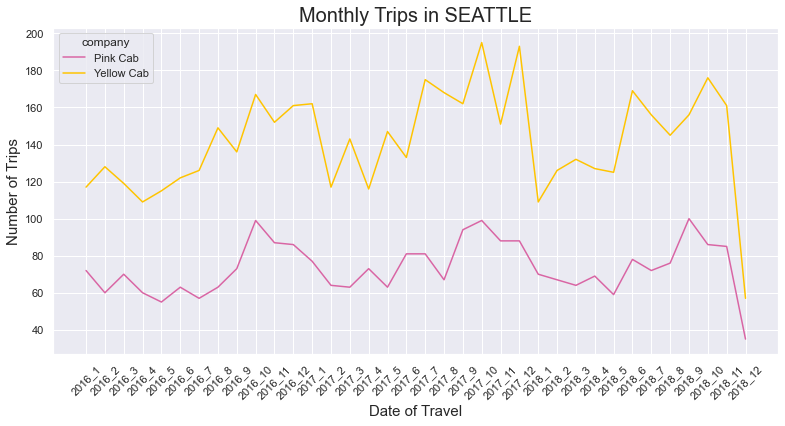

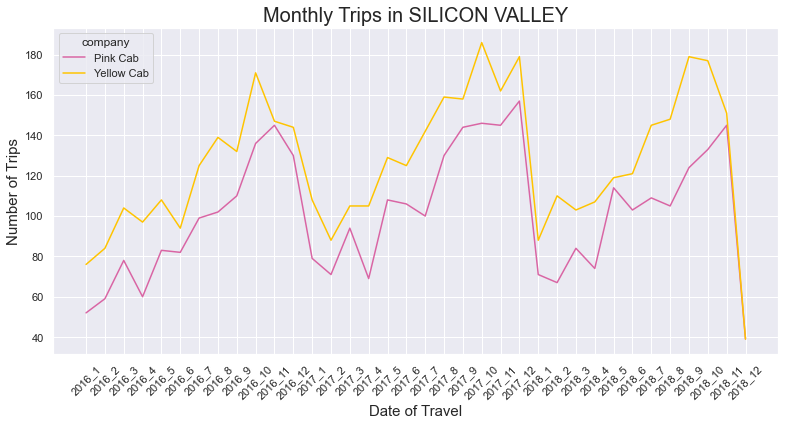

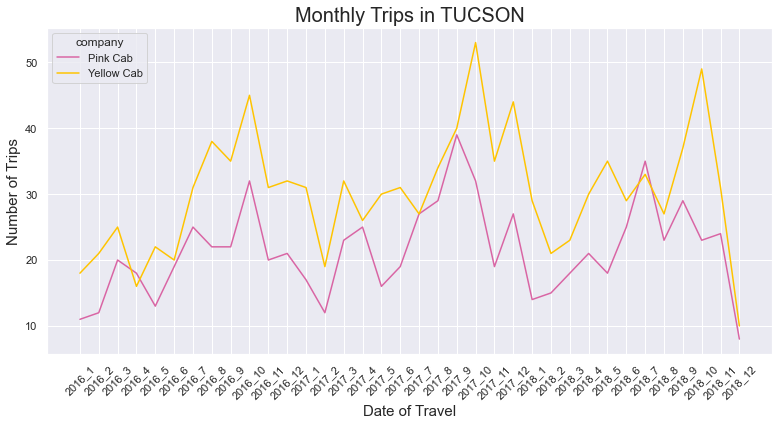

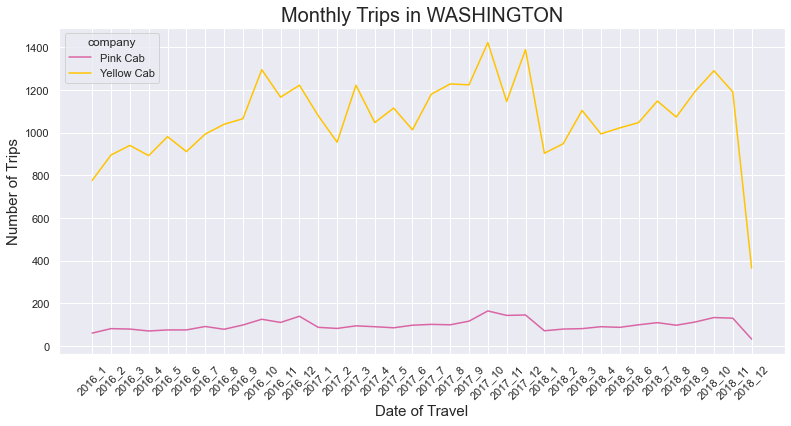

In [68]:
for i in city_trips_month.city.unique():
    plt.figure(figsize = (13,6))
    temp_df = city_trips_month.query(f"city == '{i}'")
    
    sns.lineplot(x = 'month_level', y = 'count', data = temp_df, hue = 'company', 
                 palette = palette);

    plt.title(f'Monthly Trips in {i}');
    plt.xlabel('Date of Travel');
    plt.ylabel('Number of Trips');
    plt.xticks(rotation = 45)

The above plots displays patterns at city level more clearly.
<br>
<br>
* $\color{yellow}{\text{Yellow Cab}}$ thrives on the following cities: **Atlanta, Austin, Boston, Chicago, Dallas, Denver, Los Angeles, Miami, New York, Orange County, Phoenix, Seattle, Silicon Valley, Tucson, Washington**.
<br>
<br>
* $\color{violet}{\text{Pink Cab}}$ thrives on the following cities: **Nashville and Sacramento**. 
<br>
<br>
In cities such as **Pittsburgh and San Diego** both companies have almost the same number of rides.
<br>
<br>
Overall, $\color{yellow}{\text{Yellow Cab}}$ company seems to perform well in terms of the number of rides during the time period.

# Visualizing Trip information

#### What is the income made by the driver for each trip?

**Assumptions**

1) Due to limited available data on the Internet, I will assume that the expenses for the trip only involves fuel charges. 

2) There aren't sufficient data on the Internet for the base fares per year for each city in the US. This will be left out of the analysis.

In [69]:
full_df['profit'] = full_df.price_charged - full_df.cost_of_trip #operating income
full_df

transaction_id travel_date     company         city  km_travelled  \
0             10004271  2016-01-02    Pink Cab       BOSTON         38.61   
1             10004303  2016-01-02    Pink Cab      CHICAGO         25.68   
2             10004308  2016-01-02    Pink Cab       DALLAS         22.26   
3             10004314  2016-01-02    Pink Cab       DENVER         31.59   
4             10004335  2016-01-02    Pink Cab  LOS ANGELES         25.44   
...                ...         ...         ...          ...           ...   
345972        10411495  2018-12-11  Yellow Cab   WASHINGTON         11.90   
345973        10411582  2018-12-11  Yellow Cab   WASHINGTON         31.92   
345974        10411591  2018-12-11  Yellow Cab   WASHINGTON         30.07   
345975        10411595  2018-12-11  Yellow Cab   WASHINGTON          2.06   
345976        10411596  2018-12-11  Yellow Cab   WASHINGTON         26.73   

        price_charged  cost_of_trip  customer_id payment_mode  gender  age  \
0              358.05      405.4050      59321.0         Cash    Male   45   
1              347.96      264.5040       4036.0         Cash    Male   40   
2              208.20      249.3120      24643.0         Card    Male   26   
3              269.59      353.8080      31798.0         Cash    Male   32   
4              310.69      292.5600       6194.0         Cash    Male   37   
...               ...           ...          ...          ...     ...  ...   
345972         160.24      154.2240      52841.0         Cash    Male   49   
345973         429.81      444.3264      51044.0         Cash    Male   30   
345974         400.54      375.2736      52373.0         Cash    Male   63   
345975          31.02       28.6752      51652.0         Card  Female   24   
345976         398.63      327.1752      51599.0         Card    Male   60   

        cust_income state  year  month  date  day_of_week   profit  
0             22849    MA  2016      1     2            5 -47.3550  
1              9346    IL  2016      1     2            5  83.4560  
2             18763    TX  2016      1     2            5 -41.1120  
3              8807    CO  2016      1     2            5 -84.2180  
4             18824    CA  2016      1     2            5  18.1300  
...             ...   ...   ...    ...   ...          ...      ...  
345972         6667    DC  2018     12    11            1   6.0160  
345973        13747    DC  2018     12    11            1 -14.5164  
345974         5134    DC  2018     12    11            1  25.2664  
345975         8417    DC  2018     12    11            1   2.3448  
345976         7787    DC  2018     12    11            1  71.4548  

[345977 rows x 18 columns]

In [71]:
full_df[['km_travelled', 'price_charged', 'cost_of_trip', 'profit']].describe().T

count        mean         std     min       25%       50%  \
km_travelled   345977.0   22.565243   12.231919    1.90   12.0000   22.4400   
price_charged  345977.0  424.291031  275.285546   15.60  206.7500  386.8100   
cost_of_trip   345977.0  286.166303  157.962373   19.00  151.2576  282.4640   
profit         345977.0  138.124728  161.311676 -220.06   28.1440   82.5956   

                    75%       max  
km_travelled    32.9600    48.000  
price_charged  584.9000  2048.030  
cost_of_trip   413.6832   691.200  
profit         191.3596  1463.966

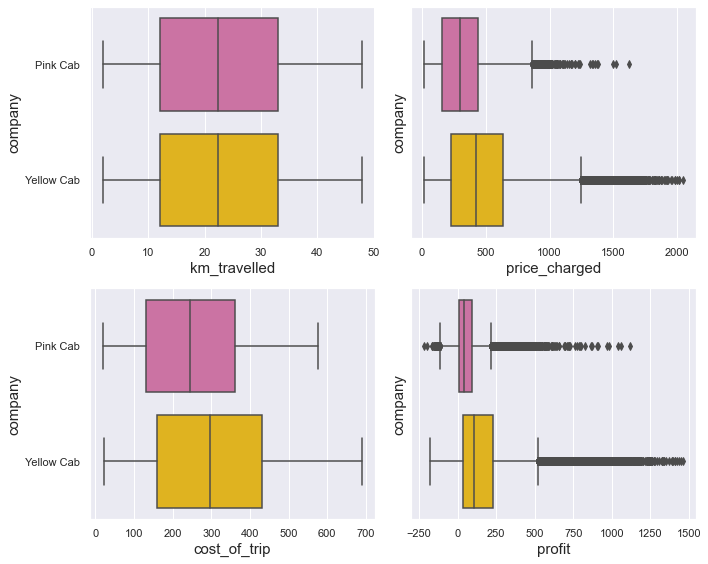

In [72]:
fig, axes = plt.subplots(2,2, figsize = (10,8), sharey = True)

for col, ax in zip(['km_travelled', 'price_charged', 'cost_of_trip', 'profit'], 
                   axes.flatten()):
    
    sns.boxplot(x = col, data = full_df, y = 'company', ax = ax, palette = palette);
    plt.tight_layout();

Above plots illustrates distribution of features related to the trip. The distributions of the distance traveled, Cab expenses all follow a uniform distribution. Only profit follows a Gaussian distribution that is skewed to the right. <br>
<br>
There are high outliers on the right side of both profit and price charged columns.Both Cab companies has the same median distance traveled. $\color{yellow}{\text{Yellow Cab}}$ has a higher Cab expenses overall. The median price charged by $\color{violet}{\text{Pink Cab}}$ is lower than it's rival company. The profit of $\color{yellow}{\text{Yellow Cab}}$ is significantly higher. 
<br>
<br>
Both Cab companies has made some $\color{red}{\text{losses}}$, as is evidents on the left side of the profit box plots. I will take a closer look at this in the next sessions.

I have a hypothesis that the outliers in the price_charged variable might be due to Cabs offering 'Premium' services, where the company offers trips in luxury or high-end vehicles. In order to test this hypothesis, I will cap the price range according to the upper limit of the inter-quantile rage for both Cab company's price_charged variable. <br>
<br>
According to my hypothesis, customers who calls for premium cabs are richer and they would use premium cabs to travel any distance.

In [73]:
#For yellow cab

yc_IQR = full_df.query('company == "Yellow Cab"').price_charged.quantile(0.75) - \
         full_df.query('company == "Yellow Cab"').price_charged.quantile(0.25)

pc_IQR = full_df.query('company == "Pink Cab"').price_charged.quantile(0.75) - \
         full_df.query('company == "Pink Cab"').price_charged.quantile(0.25)

print(f'Yellow Cab IQR = {yc_IQR:.3f}')
print(f'Pink Cab IQR = {pc_IQR:.3f}')

distance = 1.5

yc_upper_limit = full_df.query('company == "Yellow Cab"').price_charged.quantile(0.75) + \
                 (yc_IQR * distance)

pc_upper_limit = full_df.query('company == "Pink Cab"').price_charged.quantile(0.75) + \
                 (pc_IQR * distance)

print()
print(f"Yellow Cab Upper Bounday = {yc_upper_limit:.3f}")
print(f"Pink Cab Upper Bounday = {pc_upper_limit:.3f}")

Yellow Cab IQR = 408.598
Pink Cab IQR = 280.940

Yellow Cab Upper Bounday = 1248.764
Pink Cab Upper Bounday = 861.920


In [75]:
#Creating new varibale called 'is_premium'. Premium trips are marked as 1.

is_premium = []

for i in range(len(full_df)):
    if full_df['company'][i] == 'Yellow Cab':
        if full_df['price_charged'][i] >= yc_upper_limit:
            is_premium.append(1)
        else:
            is_premium.append(0)
    else:
        if full_df['price_charged'][i] >= pc_upper_limit:
            is_premium.append(1)
        else:
            is_premium.append(0)
    
full_df['is_premium'] = is_premium

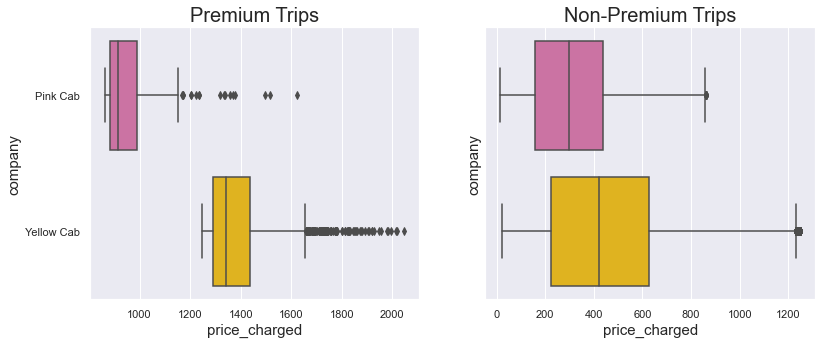

In [76]:
premium_trips = full_df.query('is_premium == 1')
non_premium_trips = full_df.query('is_premium == 0')

fig, ax = plt.subplots(1,2, figsize = (13,5), sharey = True)

sns.boxplot(x = 'price_charged', y = 'company', data = premium_trips, palette = palette, 
            order = ['Pink Cab', 'Yellow Cab'], ax = ax[0]).\
set_title('Premium Trips');


sns.boxplot(x = 'price_charged', y = 'company', data = non_premium_trips, palette = palette, ax = ax[1]).\
set_title('Non-Premium Trips');

From the above plots, price charged has been further split based on the premium category. Premium trips have a higher price range compared to non-premium trips. Almost all of the outliers within the non-premium trips has been removed. But for the premium trips, there are still outliers at the higher end of the `price_charged` variable.
<br>
<br>
Next, I will see how premium rides associate with Distance and customer income.

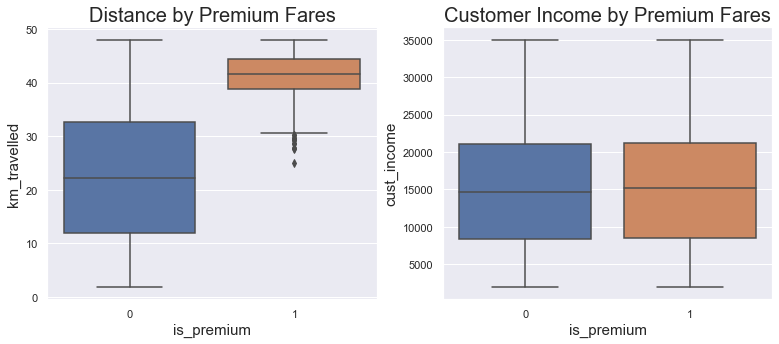

In [77]:
fig, ax = plt.subplots(1,2, figsize = (13,5))

sns.boxplot(y = 'km_travelled', x = 'is_premium', data = full_df, ax = ax[0]).\
set_title('Distance by Premium Fares');

sns.boxplot(y = 'cust_income', x = 'is_premium', data = full_df, ax = ax[1]).\
set_title('Customer Income by Premium Fares');

The above plots clearly illustrates that perhaps price_charged for the trips mainly depends on the distance traveled and that customer's income don't have much of an affect. Therefore, my hypothesis is wrong regarding the `price_charged` variable.

Next, I will visualize the data in a way that might reveal any correlation between these features. I will only take a sample of the data as it is computationally expensive to plot a Pairplot using the whole dataset.

CPU times: user 7.69 s, sys: 479 ms, total: 8.17 s
Wall time: 6.15 s


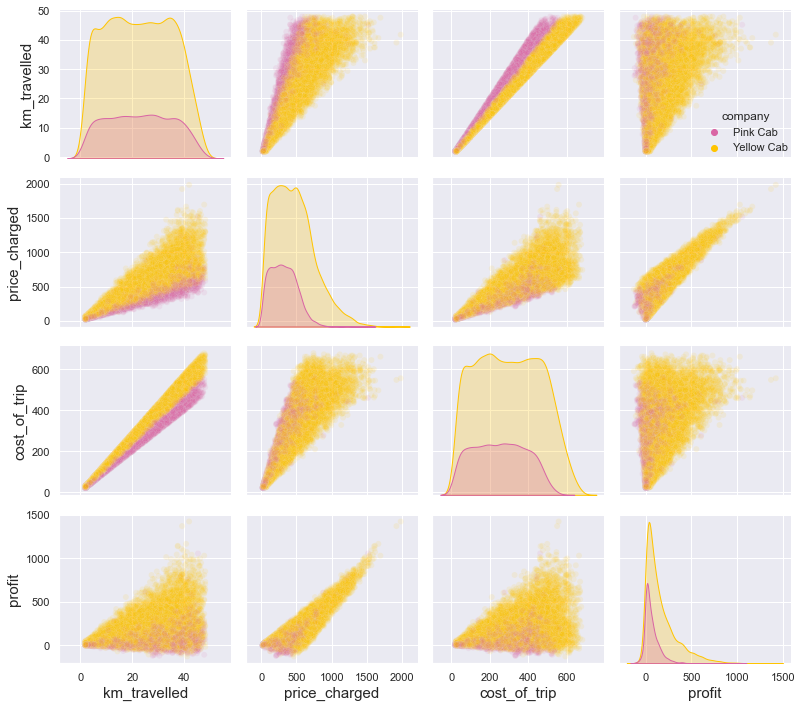

In [78]:
%%time
sampled_df_1 = full_df[['km_travelled', 'price_charged', 'cost_of_trip', 'profit', 
                      'company']].sample(frac = 0.05, random_state=42)

g = sns.pairplot(sampled_df_1, hue = 'company', hue_order = ['Pink Cab', 'Yellow Cab'], 
             palette = palette, plot_kws={'alpha': 0.1});

g._legend.set_bbox_to_anchor((0.98, 0.8))

plt.tight_layout()

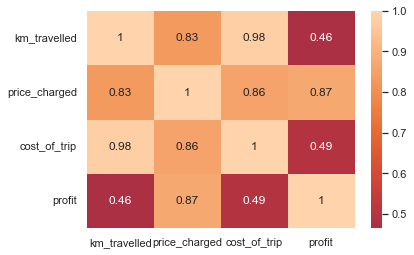

In [79]:
sns.heatmap(sampled_df_1.corr(), annot = True, center = 0);

The above plots clearly depicts that all features are correlated with each other. In general, as the distance of travel increases, both Cab expenses and Cab fares increases. The correlation is strong between distance traveled and Cab expenses. <br>
<br>
For price, expense and profit variables, **distance traveled is the compounding variable**.
<br>
<br>
For the operational expenses, there is a greater spread between all of the variables. When looking closely at the scatter plot between price charged and profit, the spread is higher when the price charged is low but the spread becomes less as the price charged increases.

#### Is daily number of trips and total distance traveled in a day correlated?

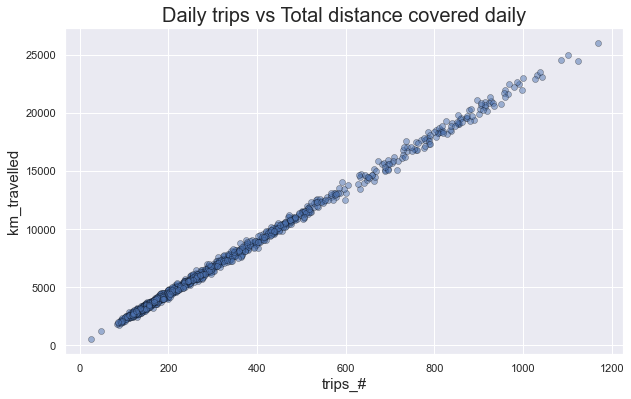

In [80]:
trip_distance_df = full_df.groupby('travel_date').agg({'km_travelled' : 'sum', 'city' : 'count'}).\
                   rename(columns = {'city' : 'trips_#'})

plt.figure(figsize = (10,6))
sns.scatterplot(x = 'trips_#', y = 'km_travelled', data = trip_distance_df, edgecolor = 'black', 
                alpha = 0.5).set_title("Daily trips vs Total distance covered daily");

There is a perfect correlation between number of trips and total distance traveled in a day. Therefore either one of these variables determines both company's daily revenues, expenses and profits.

##### Loses

In this section, we look closely at the trips did not turn a profit.

In [81]:
loss = full_df.query("profit <= 0")
loss

transaction_id travel_date     company        city  km_travelled  \
0             10004271  2016-01-02    Pink Cab      BOSTON         38.61   
2             10004308  2016-01-02    Pink Cab      DALLAS         22.26   
3             10004314  2016-01-02    Pink Cab      DENVER         31.59   
7             10004399  2016-01-02    Pink Cab   SAN DIEGO          4.72   
12            10004688  2016-01-02  Yellow Cab     CHICAGO         15.26   
...                ...         ...         ...         ...           ...   
345917        10409272  2018-12-11  Yellow Cab     CHICAGO         36.05   
345919        10409294  2018-12-11  Yellow Cab     CHICAGO         28.80   
345921        10409319  2018-12-11  Yellow Cab     CHICAGO         33.28   
345966        10410835  2018-12-11  Yellow Cab   SAN DIEGO         12.10   
345973        10411582  2018-12-11  Yellow Cab  WASHINGTON         31.92   

        price_charged  cost_of_trip  customer_id payment_mode  gender  age  \
0              358.05      405.4050      59321.0         Cash    Male   45   
2              208.20      249.3120      24643.0         Card    Male   26   
3              269.59      353.8080      31798.0         Cash    Male   32   
7               50.88       51.9200      19497.0         Card    Male   30   
12             213.84      214.2504       5883.0         Cash  Female   51   
...               ...           ...          ...          ...     ...  ...   
345917         455.60      467.2080       4193.0         Card    Male   36   
345919         363.97      411.2640       5548.0         Card    Male   38   
345921         448.02      479.2320       3400.0         Cash    Male   20   
345966         173.10      174.2400      18285.0         Cash  Female   22   
345973         429.81      444.3264      51044.0         Cash    Male   30   

        cust_income state  year  month  date  day_of_week   profit  is_premium  
0             22849    MA  2016      1     2            5 -47.3550           0  
2             18763    TX  2016      1     2            5 -41.1120           0  
3              8807    CO  2016      1     2            5 -84.2180           0  
7             11978    CA  2016      1     2            5  -1.0400           0  
12            12301    IL  2016      1     2            5  -0.4104           0  
...             ...   ...   ...    ...   ...          ...      ...         ...  
345917        23247    IL  2018     12    11            1 -11.6080           0  
345919         9799    IL  2018     12    11            1 -47.2940           0  
345921        26243    IL  2018     12    11            1 -31.2120           0  
345966        24083    CA  2018     12    11            1  -1.1400           0  
345973        13747    DC  2018     12    11            1 -14.5164           0  

[24045 rows x 19 columns]

There are about 24823 trips which ended up having a loss instead of a profit.

#### How does the distribution of losses vary across all cities?

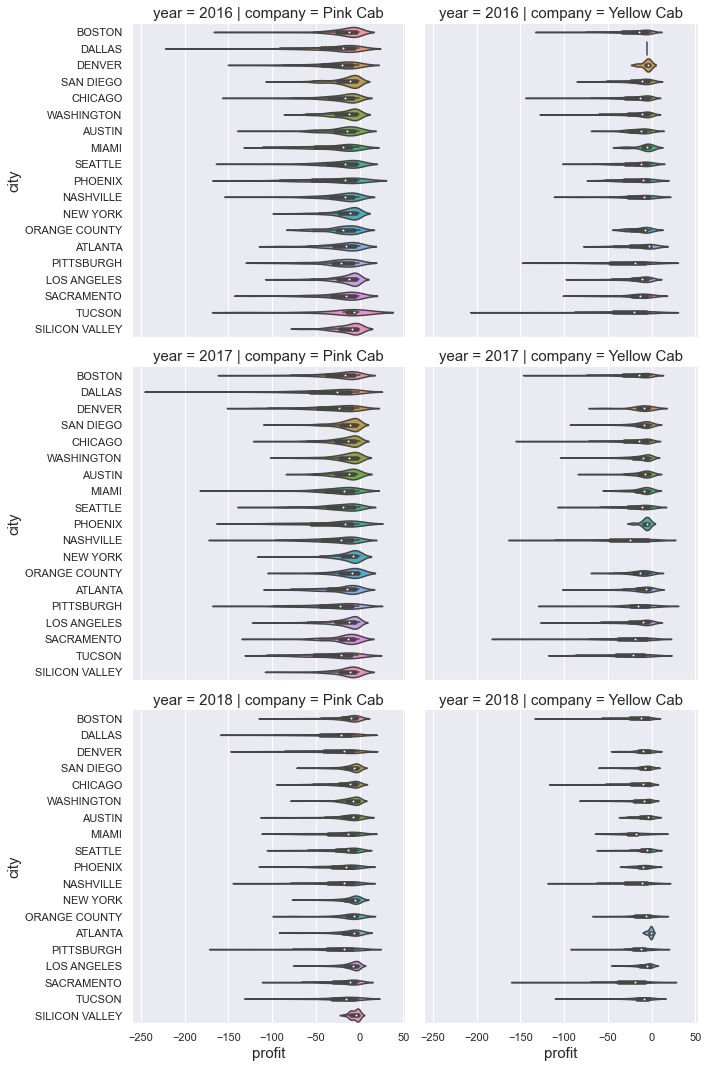

In [82]:
sns.catplot(y = 'city', x = 'profit', col = 'company', data = loss, kind = 'violin', row = 'year');

Although both companies has trips that did not make a profit, trips made my $\color{violet}{\text{Pink Cab}}$ across all cities for all three years has had a higher frequency of losses compared to $\color{yellow}{\text{Yellow Cab}}$. These losses could affect the overall profit margin of $\color{violet}{\text{Pink Cab}}$ 

#### At what time-line was the most total losses made by both companies?

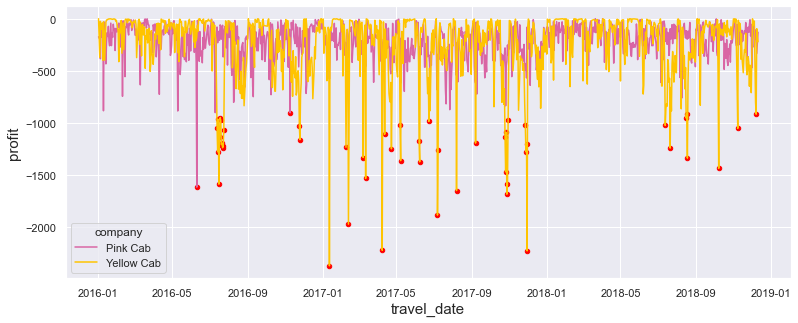

In [83]:
total_loss = loss.groupby(['travel_date', 'company']).sum()['profit'].sort_values().reset_index()

plt.figure(figsize = (13,5))

ax = sns.lineplot(x = 'travel_date', y = 'profit', data = total_loss, hue = 'company', 
             hue_order = ['Pink Cab', 'Yellow Cab'], palette = palette);

total_loss.loc[:50, ["travel_date", "profit"]].plot.scatter("travel_date", "profit", 
                                                            color = 'red', ax = ax);

The above plot shows a time-line of trips that only made losses which is aggregated at a daily level by summing up the losses. Here, $\color{yellow}{\text{Yellow Cab}}$  has had a series of total losses every year. What's apparent is a pattern. There are a few cluster of losses during certain time periods at particular months, most apparent during the months of July and August. 

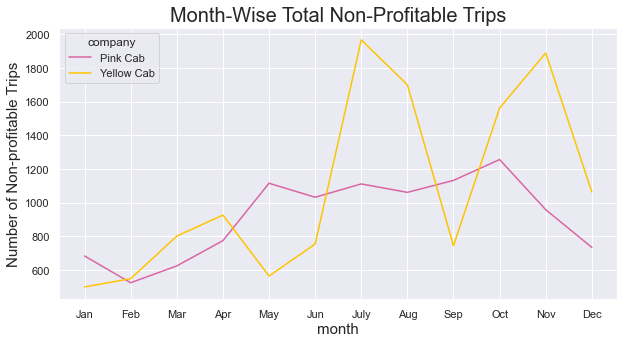

In [84]:
month_loss_count = loss.groupby(['month', 'company']).size().reset_index().\
                                                        rename(columns = {0:'count'})

plt.figure(figsize = (10,5))
sns.lineplot(x = 'month', y = 'count', hue = 'company', data = month_loss_count, 
             palette = palette);

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.xticks(np.arange(1,13,1), labels = months);
plt.ylabel('Number of Non-profitable Trips');
plt.title("Month-Wise Total Non-Profitable Trips");

From the above plot, we can deduce that $\color{yellow}{\text{Yellow Cab}}$ makes the highest non-profitable trips during the months of July, August, November and December. For $\color{violet}{\text{Pink Cab}}$, it is during September and October.

#### I will test the hypothesis if losses differs across months.

In [85]:
loss_month_profit = loss[['month', 'profit']]
loss_month_profit

month   profit
0           1 -47.3550
2           1 -41.1120
3           1 -84.2180
7           1  -1.0400
12          1  -0.4104
...       ...      ...
345917     12 -11.6080
345919     12 -47.2940
345921     12 -31.2120
345966     12  -1.1400
345973     12 -14.5164

[24045 rows x 2 columns]

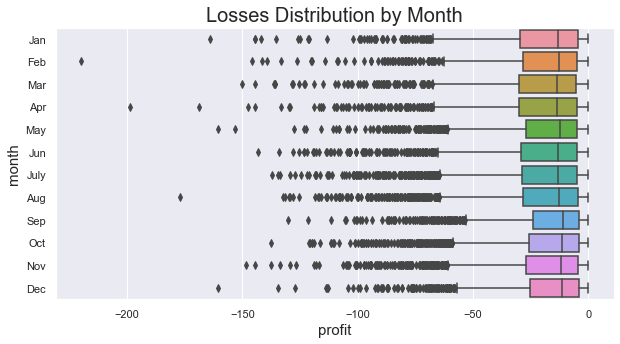

In [86]:
plt.figure(figsize = (10,5));
ax = sns.boxplot(y = 'month', x = 'profit', data = loss_month_profit, orient = 'h').\
set_title("Losses Distribution by Month");

plt.yticks(np.arange(0,12,1), labels = months);

The distribution of losses are all skewed across all months. The above plot does not follow the assumptions of an ANOVA one-way test as the distribution is skewed. Therefore I will employ a non-parametric test called 'Kruskal-Wallis H-test'. It is a non-parametric version of ANOVA.
<br>
<br>
The Kruskal-Wallis H-test tests the null hypothesis that the population **median** of all of the groups are equal.
<br>
<br>
Therefore, I will employ this test to check whether any associations exists between month and losses made.

In [87]:
#creating arrays of profit(losses) for each month

jan = loss_month_profit.query('month == 1')['profit'].values
feb = loss_month_profit.query('month == 2')['profit'].values
mar = loss_month_profit.query('month == 3')['profit'].values
apr = loss_month_profit.query('month == 4')['profit'].values
may = loss_month_profit.query('month == 5')['profit'].values
jun = loss_month_profit.query('month == 6')['profit'].values
jul = loss_month_profit.query('month == 7')['profit'].values
aug = loss_month_profit.query('month == 8')['profit'].values
sep = loss_month_profit.query('month == 9')['profit'].values
octr = loss_month_profit.query('month == 10')['profit'].values
nov = loss_month_profit.query('month == 11')['profit'].values
dec = loss_month_profit.query('month == 12')['profit'].values

#### * **Null hypothesis**: Monthly profit medians are equal (no variation in means of groups). <br>
H0: m1=m2=…=mp
<br>
<br>
#### * **Alternative hypothesis**: At least one monthly profit median is different from other months. <br>
H1: All μ are not equal

In [88]:
from scipy import stats

alpha = 0.05
H, p = stats.kruskal(jan, feb, mar, apr, may, jun, jul, aug, sep, octr, nov, dec)

print(f'H-Value: {H:.3f}')
print(f'P-value: {p:.3f}')
print()

alpha = 0.01

if p <= alpha:
    print('P-value less than alpha - Reject H0')
else:
    print('P-value higher than alpha - Cannot Reject H0')

H-Value: 63.967
P-value: 0.000

P-value less than alpha - Reject H0


The above tests signifies that the median losses differs across months and that losses are higher during some particular months.

#### In which city does both companies makes  most bad trips?

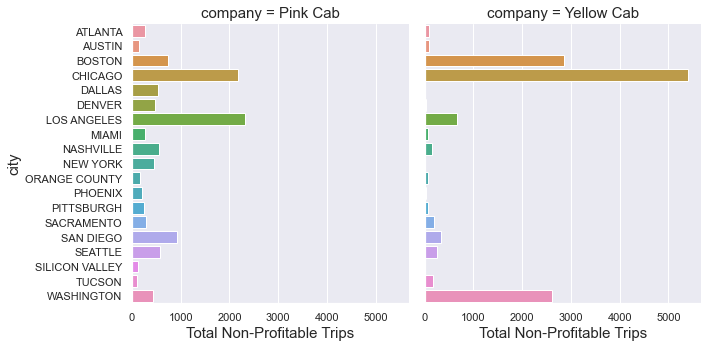

In [89]:
loss_city = loss.groupby(['city', 'company']).size().reset_index().rename(columns = {0:'count'})

g = sns.catplot(y = 'city', x = 'count', col = 'company', data = loss_city, kind = 'bar');

g.set_xlabels("Total Non-Profitable Trips");

According to the data, the most number of non-profit trips made by $\color{yellow}{\text{Yellow Cab}}$ was on Chicago, Boston, Washington and Los Angeles. For $\color{violet}{\text{Pink Cab}}$, its mostly on Chicago and Los Angeles.

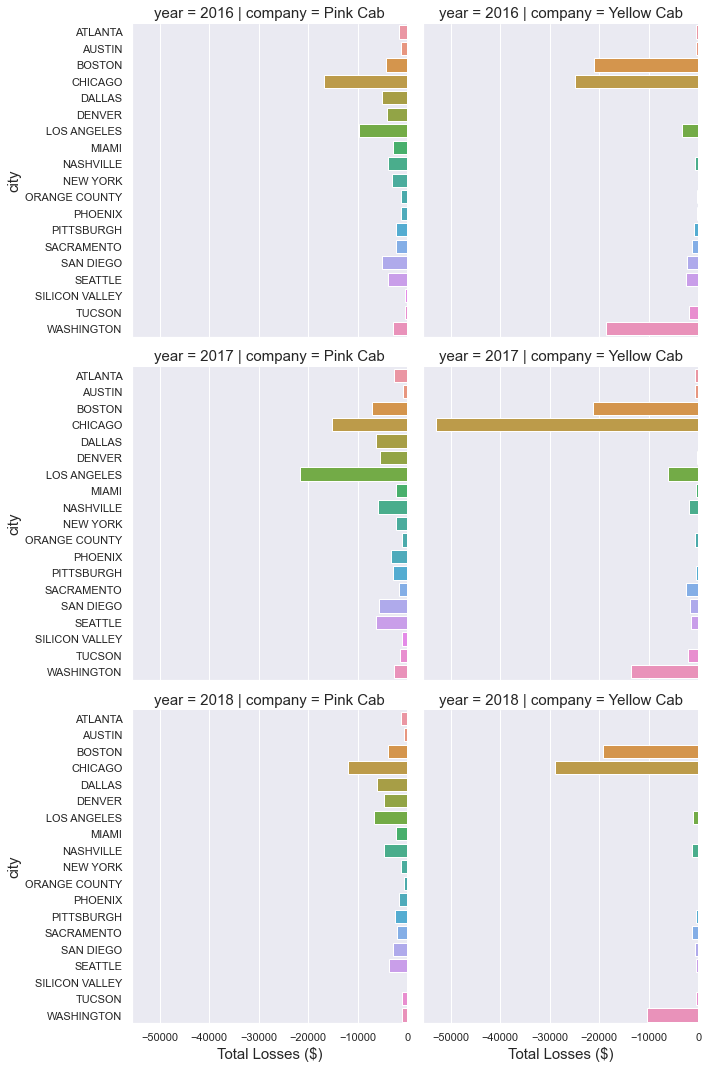

In [90]:
loss_year_city = loss.groupby(['year', 'city', 'company']).sum()['profit'].reset_index()

g = sns.catplot(y = 'city', x = 'profit', col = 'company', row = 'year', data = loss_year_city, 
                kind = 'bar');

g.set_xlabels("Total Losses ($)");

For $\color{yellow}{\text{Yellow Cab}}$, losses made from non-profit trips was the highest on Chicago during 2017. For $\color{violet}{\text{Pink Cab}}$, it was on Los Angeles during 2017.

#### How much does the monthly Cab Fare, Cab expenses and profit vary across all states for both Cab companies?

In [91]:
#Grouping by year, month, state and company and taking the median of Cab fare and expenses

#I take the median, as the distribution of both profit and price charged in heavily skewed to the right.

cab_monthly_finances = full_df.groupby(['year', 'month', 'state', 'company']).\
median()[['price_charged', 'cost_of_trip', 'profit']].reset_index()

#Concatenating year and month into a single column
cab_monthly_finances['month_level'] = cab_monthly_finances['year'].astype('str') + "-" + \
                                                cab_monthly_finances['month'].astype('str')

#dropping individual year and month column
cab_monthly_finances.drop(['year', 'month'], axis = 1, inplace = True)

#unpivoting price charge and cost of trip in order to make it easier to plot both in a single axis
cab_monthly_finances = cab_monthly_finances.melt(id_vars = ['state', 'company', 'month_level'], 
                                                 var_name = 'inc_exp', value_name = 'amount')

cab_monthly_finances

state     company month_level        inc_exp    amount
0       AZ    Pink Cab      2016-1  price_charged  222.8300
1       AZ  Yellow Cab      2016-1  price_charged  357.5600
2       CA    Pink Cab      2016-1  price_charged  318.2700
3       CA  Yellow Cab      2016-1  price_charged  436.1600
4       CO    Pink Cab      2016-1  price_charged  269.5900
...    ...         ...         ...            ...       ...
2803    TN  Yellow Cab     2018-12         profit   48.9500
2804    TX    Pink Cab     2018-12         profit   38.3140
2805    TX  Yellow Cab     2018-12         profit  168.2404
2806    WA    Pink Cab     2018-12         profit   11.4800
2807    WA  Yellow Cab     2018-12         profit   68.8436

[2808 rows x 5 columns]

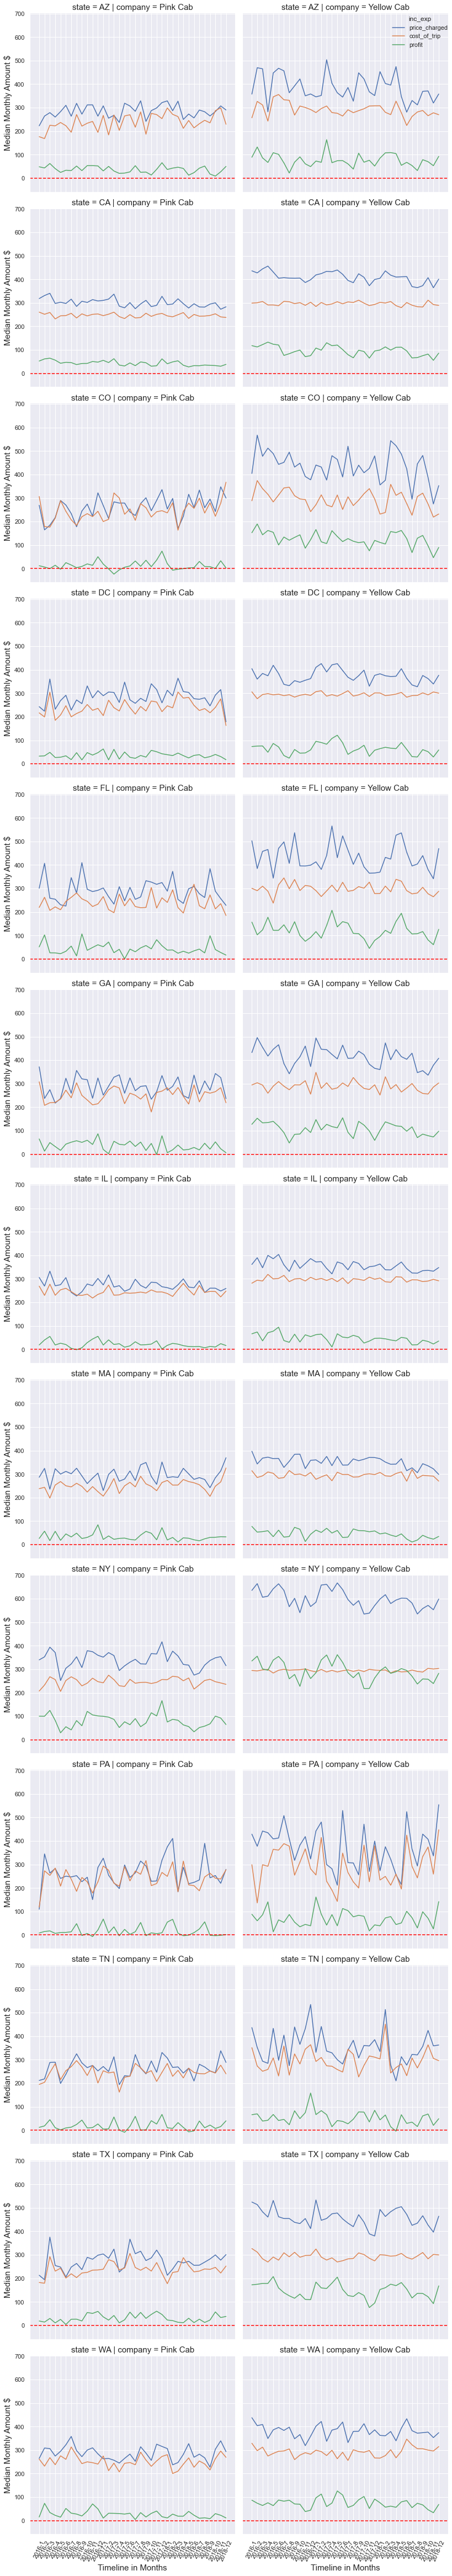

In [92]:
g = sns.relplot(y = 'amount', x = 'month_level', data = cab_monthly_finances, kind = 'line', 
                hue = 'inc_exp', row = 'state', col = 'company');

axes = g.axes.flatten()

for ax in axes:
    ax.axhline(0, ls='--', color='red') #to mark profit below zero

g.set_xticklabels(rotation=65);
plt.tight_layout();

g.set_ylabels("Median Monthly Amount $");
g.set_xlabels("Timeline in Months");
g._legend.set_bbox_to_anchor((0.99, 0.985))

The above plots represents the monthly median Cab fares and Cab expenses for both companies across all states. The $\color{blue}{\text{blue line}}$ represents the average $\color{blue}{\text{price charged}}$ for the trips and the $\color{orange}{\text{orange line}}$ represents the $\color{orange}{\text{cab expenses}}$. $\color{green}{\text{green line}}$ represents the $\color{green}{\text{profit}}$.
The $\color{red}{\text{red line}}$ marks the border where any amount (mainly $\color{green}{\text{profit}}$) below zero is $\color{red}{\text{losses}}$. These are my observations:
<br>
* Across all states, $\color{yellow}{\text{Yellow Cab}}$ has higher $\color{orange}{\text{cab expenses}}$ compared to $\color{violet}{\text{Pink Cab}}$. 
<br>
<br>
* In general, $\color{violet}{\text{Pink Cab}}$ has lower $\color{blue}{\text{price charged}}$ compared to $\color{yellow}{\text{Yellow Cab}}$. This is especially discernible in the state of New York.
<br>
<br>
* Like $\color{blue}{\text{price charged}}$, $\color{green}{\text{profit}}$ for $\color{yellow}{\text{Yellow Cab}}$ is higher than it's rival. Both $\color{blue}{\text{price charged}}$ and $\color{green}{\text{profit}}$ follows the same pattern.
<br>
<br>
* For the state of New York, which has the highest Cab passengers compared to any other states, $\color{yellow}{\text{Yellow Cab}}$ has the highest Cab Fares compared to $\color{violet}{\text{Pink Cab}}$ during the same time-line. $\color{yellow}{\text{Yellow Cab's}}$ $\color{green}{\text{profit}}$ is significantly higher in New York compared to any other state.
<br>
<br>
* There is an interesting pattern for the state of PA (Pennsylvania). During February 2018, both Cab fares and Cab expenses of $\color{violet}{\text{Pink Cab}}$ dipped way below the norm. At that same time period, the Cab Fares of $\color{yellow}{\text{Yellow Cab}}$ has shown a significant spike.
<br>
<br>
* Both Cab companies makes median $\color{red}{\text{losses}}$ during time periods across all states. This is more frequent for $\color{violet}{\text{Pink Cab}}$ in states such as Colorado, Florida, Georgia, Illinois, Massachusetts, Pennsylvania, Tennessee, Texas and Washington. For $\color{yellow}{\text{Yellow Cab}}$, there are barely any months making median $\color{red}{\text{losses}}$. This could signify that $\color{yellow}{\text{Yellow Cab}}$ perform better across all states and any $\color{red}{\text{losses}}$ it makes from non-profit trips will be easily offsetted by the amount of $\color{green}{\text{profit}}$ it makes.

It is important to note that for all the three variables, there is a confounding variable, which is the distance traveled (`km_traveled`). Perhaps binning this variable will help help in further analysis.

### Distance (`km_travelled`)

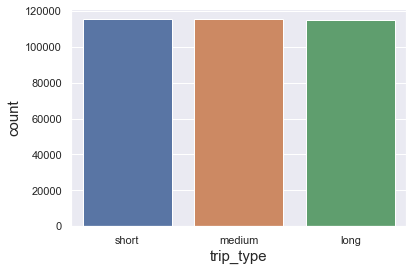

In [93]:
#Binning km_travelled in to 3 equal freq quantiles.

full_df['trip_type'] = pd.qcut(full_df.km_travelled, 3, labels = ['short', 'medium', 'long'])
#Short distance = 1.899 to 15.47 km
#medium distance = 15.47 to 29.4 km
#Short distance = 29.4 to 48.0 km

sns.countplot(full_df.trip_type);

All trip durations have equal occurrences according to the data.

#### How does price charged vary with different trip intervals at State level?

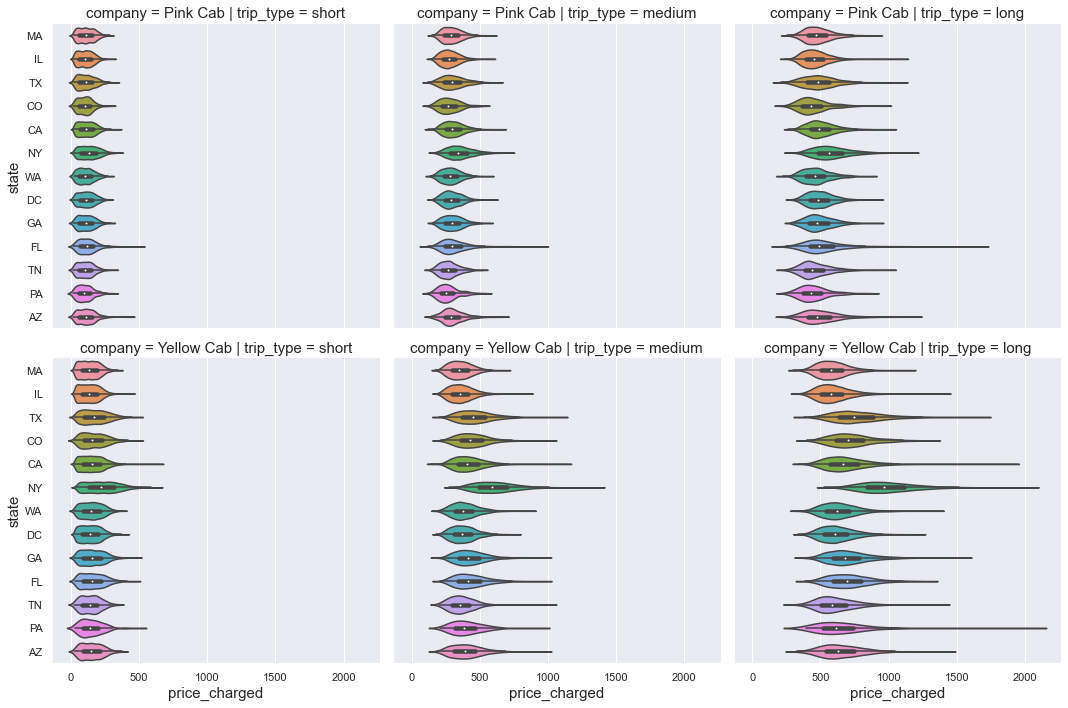

In [94]:
sns.catplot(x = 'price_charged', y = 'state', data = full_df, row = 'company', kind = 'violin', 
           col = 'trip_type');

plt.tight_layout()

From the above plots, the price charged for short distance trips by both cab companies across all states are roughly the same, except for New York. As the distance increases, more variations in prices charged across all states is observed for $\color{yellow}{\text{Yellow Cab}}$. Comparatively, prices charged for a particular distance category by $\color{violet}{\text{Pink Cab}}$ remains roughly the same across all states.

#### How does Expenses vary with different trip intervals at State level?

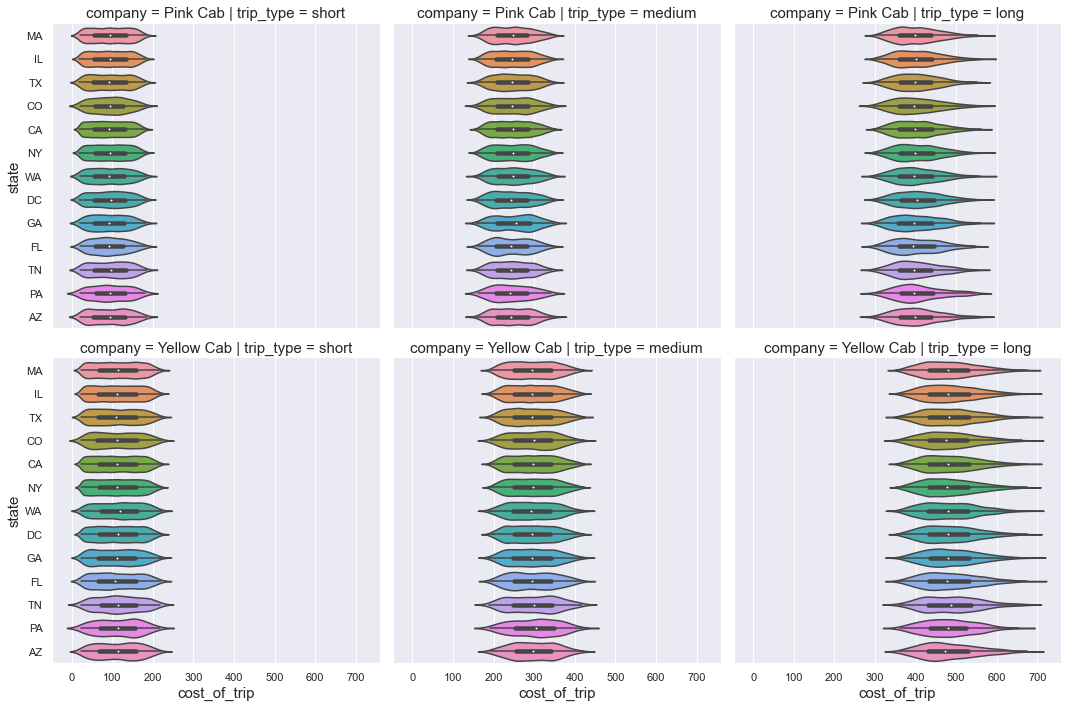

In [95]:
sns.catplot(x = 'cost_of_trip', y = 'state', data = full_df, row = 'company', kind = 'violin', 
           col = 'trip_type');

plt.tight_layout()

Cab expenses remains uniform at different trip intervals across all states.

#### How does profit vary with different trip intervals at State level?

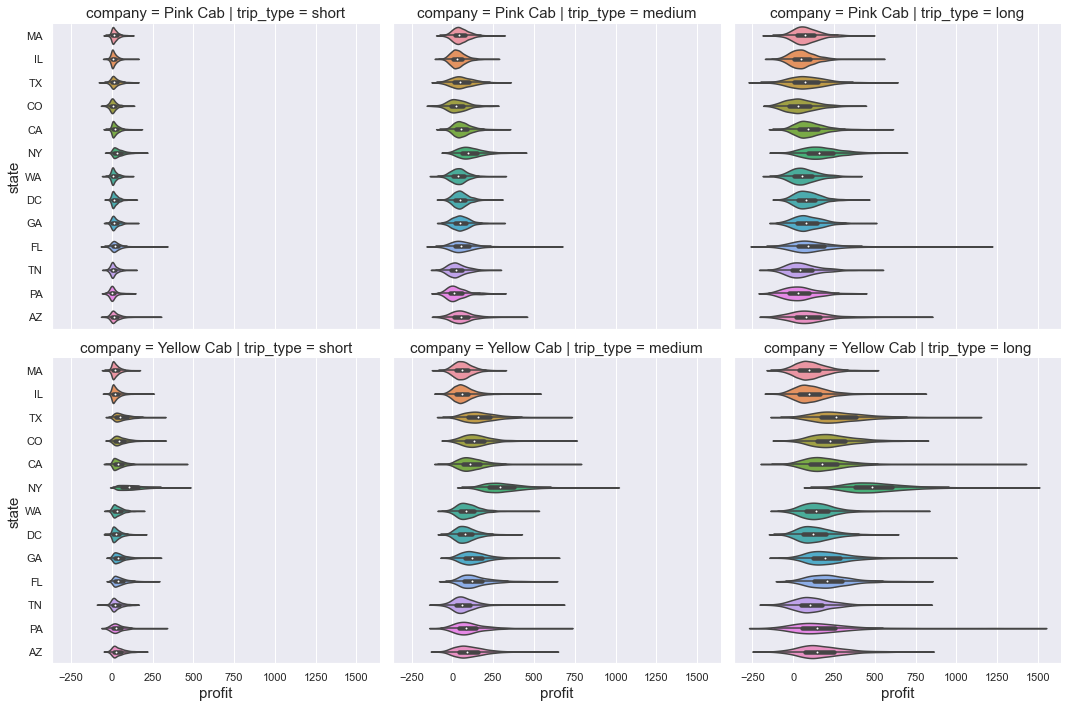

In [96]:
sns.catplot(x = 'profit', y = 'state', data = full_df, row = 'company', kind = 'violin', 
           col = 'trip_type');

plt.tight_layout()

From the above plot, there is a higher probability of making high profits when the trip duration is long across all states.

#### At which distance interval most non-profit trips are made by both companies?

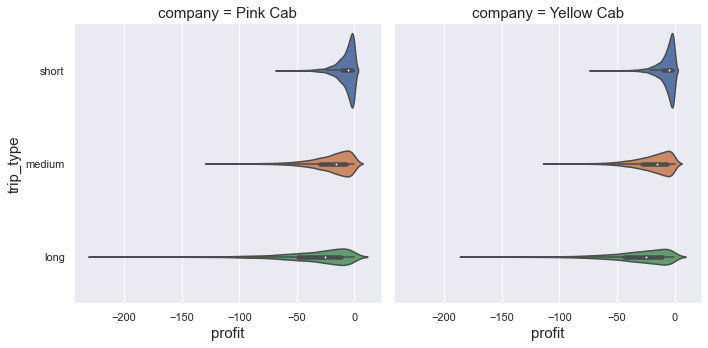

In [97]:
loss_dist = full_df.query("profit < 0")[['profit', 'company', 'trip_type']]

g = sns.catplot(x = 'profit', y = 'trip_type', col = 'company', data = loss_dist, kind = 'violin');

For both Cab companies, short trips results in higher frequency of losses. Losses made during medium trips are roughly the same for both. For long trips, although the frequency is less compared to other two intervals, there is a small probability to make higher losses. $\color{violet}{\text{Pink Cab}}$ has has trips with the highest losses compared to it's rival.

#### How does Distance affect the price, costs and profit?

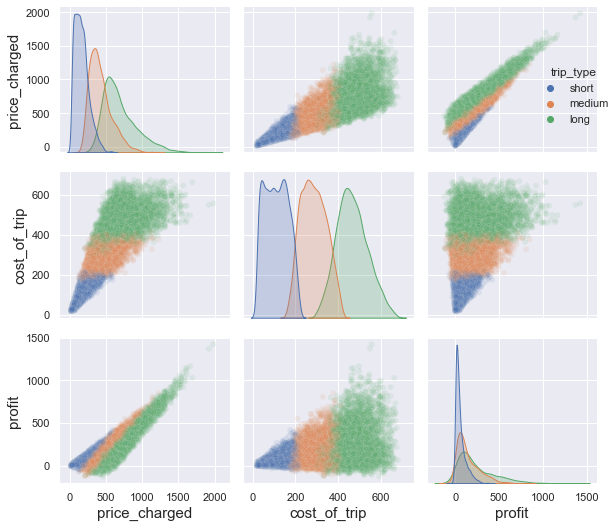

In [98]:
sampled_df_2 = full_df[['price_charged', 'cost_of_trip', 'profit', 'trip_type']].\
sample(frac = 0.05, random_state=42)

g = sns.pairplot(sampled_df_2, hue = 'trip_type', plot_kws={'alpha': 0.1});

g._legend.set_bbox_to_anchor((1, 0.8))
plt.tight_layout();

The above plots depicts at each distance intervals, the price, profit and costs increases, although there is a higher variability in all variables as the distance increases.

Next, I will bin `profit` into different levels and see it's relation with distance.

In [100]:
bins = [-221, 0.00001, 30.5, 85.5, 200.5, 800.5, 1464]
#Here, I assume where that profit = 0 is also loss.

label = ['loss', 'low', 'average', 'above-average', 'high', 'highest']

full_df['profit_level'] = pd.cut(full_df.profit, bins = bins, labels = label)

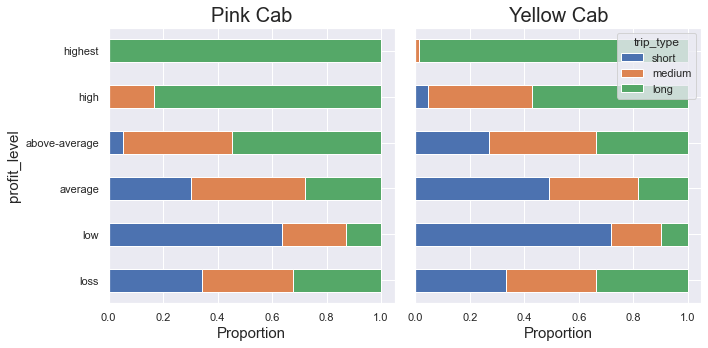

In [101]:
fig, ax = plt.subplots(1,2, figsize = (10,5), sharey = True, tight_layout = True);

pd.crosstab(index = full_df.query("company == 'Pink Cab'").profit_level, 
            columns = full_df.query("company == 'Pink Cab'").trip_type, normalize = 'index').\
plot(kind = 'barh', stacked = True, ax = ax[0], title = "Pink Cab", legend = False);

ax[0].set_xlabel('Proportion');

pd.crosstab(index = full_df.query("company == 'Yellow Cab'").profit_level, 
            columns = full_df.query("company == 'Yellow Cab'").trip_type, 
            normalize = 'index').plot(kind = 'barh', stacked = True, ax = ax[1], 
                                     title = "Yellow Cab");

ax[1].set_xlabel('Proportion');

The above plots depicts proportion of trip_intervals that contributes to each profit level for both companies. For the loss category (where profit <= 0), all three trip durations have equal intervals, which could mean that distance might not be the main factor contributing to losses for both Cab companies.
<br>
<br>
Long trips contributes the most to highest profit.
<br>
<br>
What sets apart $\color{yellow}{\text{Yellow Cab}}$ is that it is able to make better profits from shorter trips compared to it's rival. 

#### Is there any association between daily number of trips and trip types?

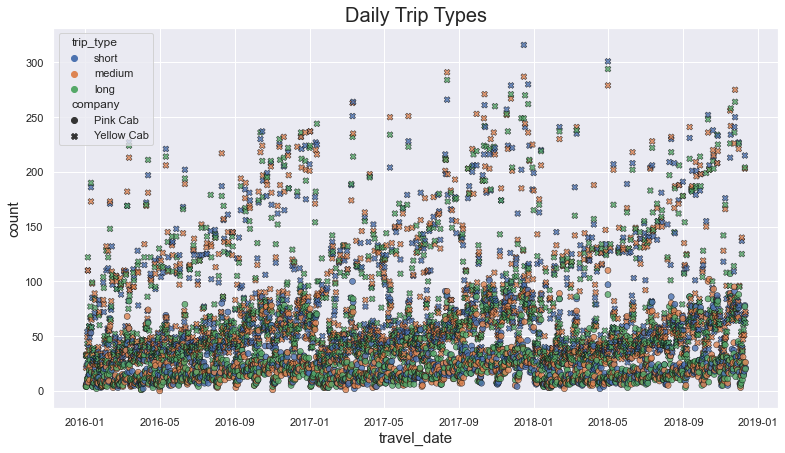

In [102]:
trip_date = full_df.groupby(['travel_date', 'company', 'trip_type']).size().reset_index().\
            rename(columns={0:'count'})

plt.figure(figsize = (13,7))
sns.scatterplot(x = 'travel_date', y = 'count', hue = 'trip_type', data = trip_date, alpha = 0.8, 
               edgecolor="black", style = 'company').set_title('Daily Trip Types');

At a daily level, there seems to be equal frequency of all trip types. No trip stands out in particular. Even on 5th Jan 2018, when the highest number of trips were made according to the data, all trip types were made on that day.

#### Is there any association between distance traveled and profit being at a loss?

I will use **chi-squared test** to test my hypothesis.

In [103]:
#Is there any association between distance travelled and profit_level being loss?

pd.crosstab(index = full_df.query("profit_level == 'loss'").profit_level, 
            columns = full_df.query("profit_level == 'loss'").trip_type)

trip_type     short  medium  long
profit_level                     
loss           8131    7943  7971

#### **Null Hypothesis (H0)**: There is no association between Loss and trip_type. <br>
#### **Alternative hypothesis (H1)**: There is an association between loss and trip_type. 

In [104]:
data = pd.crosstab(index = full_df.query("profit_level == 'loss'").profit_level, 
            columns = full_df.query("profit_level == 'loss'").trip_type).values

from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(data)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 1.0
Independent (H0 holds true)


There is no association between profit being loss and distance traveled. 

#### Let's also test whether any association exists between other profit levels and distance traveled. The Null hypothesis remains the same as before (except its for profit instead of loss).

In [105]:
data = pd.crosstab(index = full_df.query("profit_level != 'loss'").profit_level, 
            columns = full_df.query("profit_level != 'loss'").trip_type).values

stat, p, dof, expected = chi2_contingency(data)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.0
Dependent (reject H0)


For other profit levels, there is an association between distance profit and distance traveled.

# Customer Income

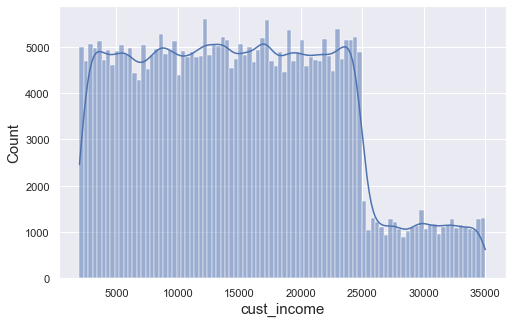

In [106]:
#Distribution of Customer Income
plt.figure(figsize = (8,5))
sns.histplot(x = 'cust_income', kde = True, data = full_df);

Just like age variable, the income of customers also follows a two-phase uniform distribution, signifying that there is an equal probability of finding customers belonging to all ranges of salary below 25000 $ and lower but yet equal probability of finding customer's of higher income range.

##### Is there a relation between customer's income and the number of times the customer uses a Cab service?

In [107]:
#Creating a dataset that displays customer id, customer's income and total number of times the 
#customer has made the trip.

customer_income_trip_df = full_df.groupby(['customer_id', 'cust_income']).size().\
                                                reset_index().rename(columns = {0:'count'})

customer_income_trip_df

customer_id  cust_income  count
0              1.0        16359     28
1              2.0        12069     39
2              3.0        12968     45
3              4.0        13803     25
4              5.0         9965     29
...            ...          ...    ...
45682      59996.0        16634      4
45683      59997.0        22352      9
45684      59998.0         5678      9
45685      59999.0        24577      8
45686      60000.0        20303     14

[45687 rows x 3 columns]

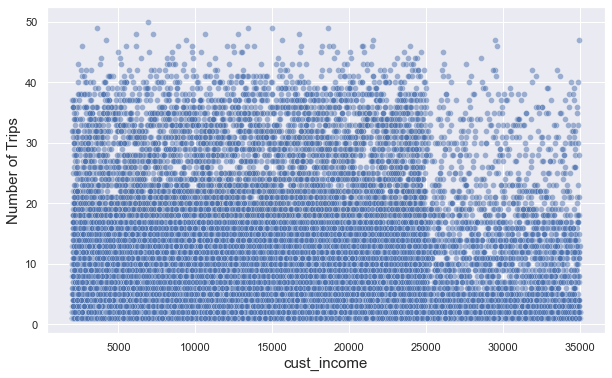

In [108]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'cust_income', y = 'count', data = customer_income_trip_df, 
               alpha = 0.5);
plt.ylabel("Number of Trips");

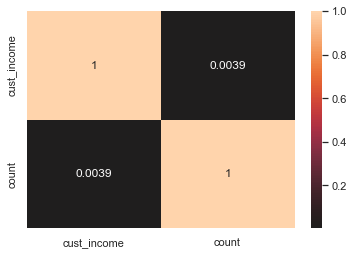

In [109]:
#Correlation using spearman as the data is not normally distributed and both variables are discrete, 
#not continuous.
sns.heatmap(customer_income_trip_df.iloc[:,1:].corr('spearman'), annot = True, center = 0);

According to the data in hand, there is absolutely no correlation between a customer's income and the number of times a customer travels using Cabs. Perhaps binning income levels help add more insights to our analysis. I have sourced income range categories from here: https://money.usnews.com/money/personal-finance/family-finance/articles/where-do-i-fall-in-the-american-economic-class-system 

In [110]:
#Binning income levels

bins = [0, 2670.5, 4451.5, 8903.5, 20030.5, 35000.5]
label = ['low', 'low-middle', 'middle', 'upper-middle', 'high']

full_df['income_levels'] = pd.cut(full_df.cust_income, bins = bins, labels = label)

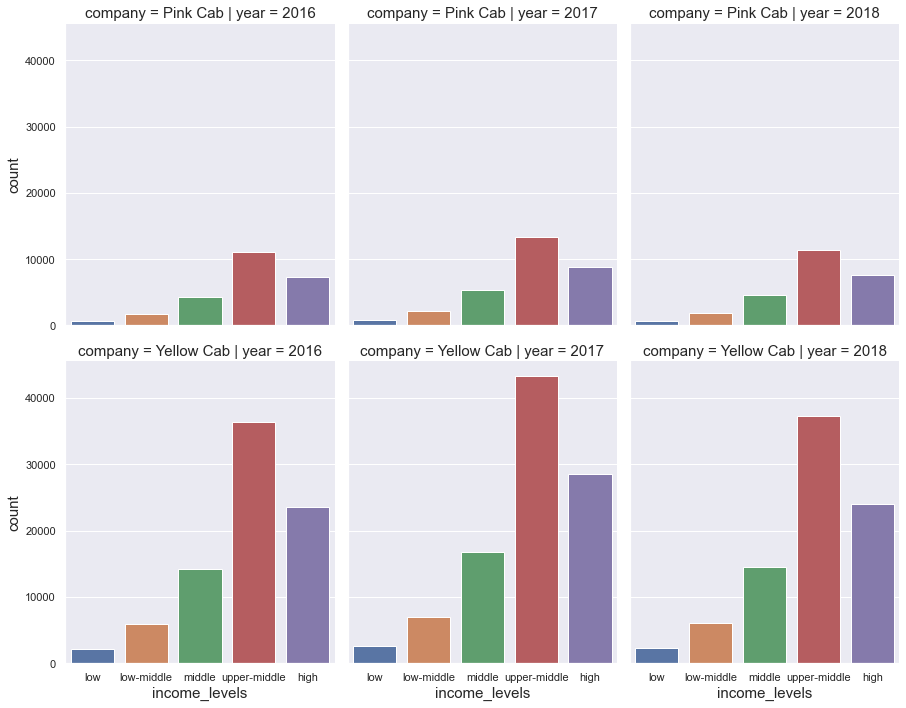

In [111]:
income_count = full_df.groupby(['year', 'company', 'income_levels']).size().reset_index().\
                                                                rename(columns = {0:'count'})

sns.catplot(x = 'income_levels', y = 'count', row = 'company', col = 'year', data = income_count, 
           kind = 'bar', aspect = 0.85);

After binning income, we can see that most of the passengers belong to upper-middle class for both Cab companies, followed by high income class. $\color{yellow}{\text{Yellow Cab}}$ have higher proportion of passengers. For both companies, there is a slight growth in passengers from 2016 to 2017, but then stagnated/dipped slightly below from 2017 to 2018.

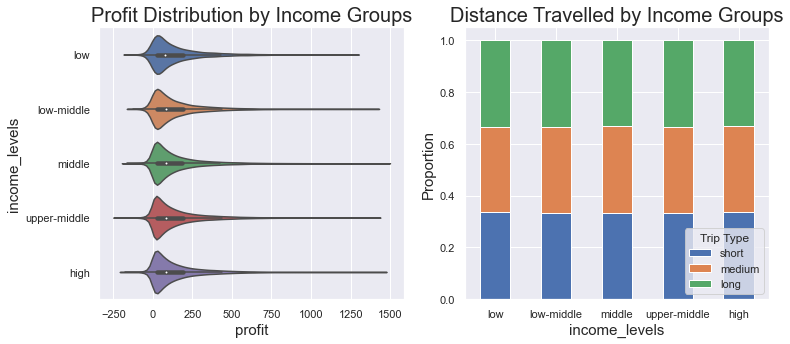

In [112]:
fig, ax = plt.subplots(1, 2, figsize = (12,5))

sns.violinplot(x = 'profit', y = 'income_levels', data = full_df, ax = ax[0]).\
                            set_title("Profit Distribution by Income Groups");

pd.crosstab(index = full_df.income_levels, columns = full_df.trip_type, normalize = 'index').\
plot(kind = 'bar', stacked = True, rot = 0, ax = ax[1], title = "Distance Travelled by Income Groups").\
legend(loc = "lower right", title = "Trip Type");

ax[1].set_ylabel('Proportion');

Across all income groups, the distribution of profit from all income classes are the same. Similarly, customers from all income classes have equal proportion of trip durations.

In [113]:
#Null Hypothesis (H0): No association between income and distance travelled
#Alternative (H1): Association exists between these 2 variables

data = pd.crosstab(index = full_df.income_levels, columns = full_df.trip_type).values

stat, p, dof, expected = chi2_contingency(data)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.4934027795639213
Independent (H0 holds true)


Both the plots and statistical tests proved that distance traveled does not depend on the income level of the customer.

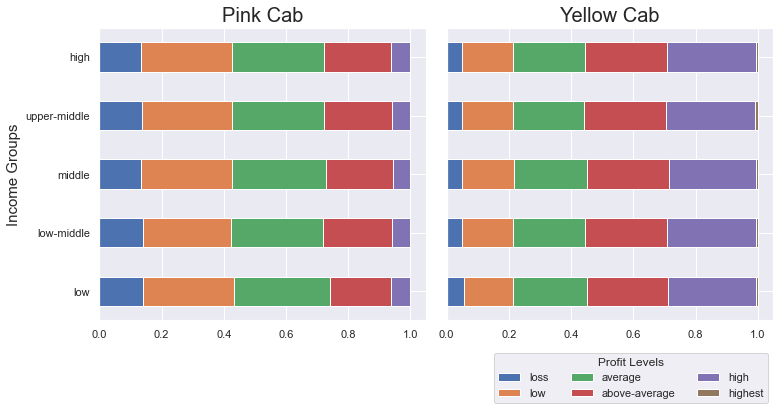

In [114]:
fig, ax = plt.subplots(1, 2, tight_layout = True, figsize = (11, 6), sharey = True)

#Pink Cab
pd.crosstab(columns = full_df.query("company == 'Pink Cab'").profit_level,
            index = full_df.query("company == 'Pink Cab'").income_levels, 
            normalize = 'index').\
plot(kind = 'barh', stacked = True, title = "Pink Cab", ylabel = "Proportion", 
                 xlabel = 'Income Groups', ax = ax[0], legend = False)

#Yellow Cab
pd.crosstab(columns = full_df.query("company == 'Yellow Cab'").profit_level, 
            index = full_df.query("company == 'Yellow Cab'").income_levels, 
            normalize = 'index').\
plot(kind = 'barh', stacked = True, title = "Yellow Cab", ylabel = "Proportion", 
                 xlabel = 'Income Groups', ax = ax[1]).\
legend(loc='lower right', bbox_to_anchor=(1.0, -0.3), ncol = 3, title = 'Profit Levels');

For both companies, the proportion of profit levels are the same for customer's of all income levels. There is no association between Customer's income and profit.

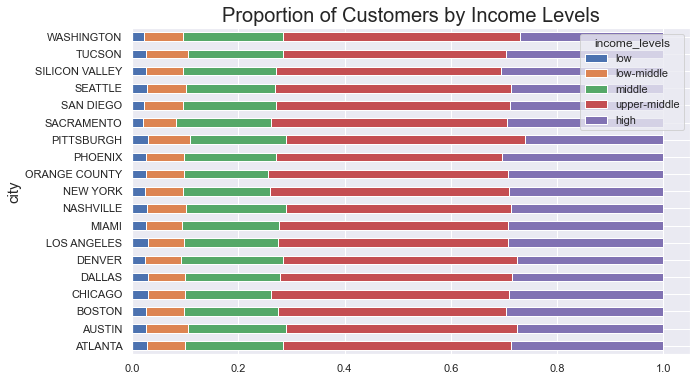

In [115]:
pd.crosstab(full_df.city, columns = full_df.income_levels, normalize = 'index').\
plot(kind = 'barh', stacked = True, figsize = (10,6), title = "Proportion of Customers by Income Levels");

All cities have similar customer distributions by income level.

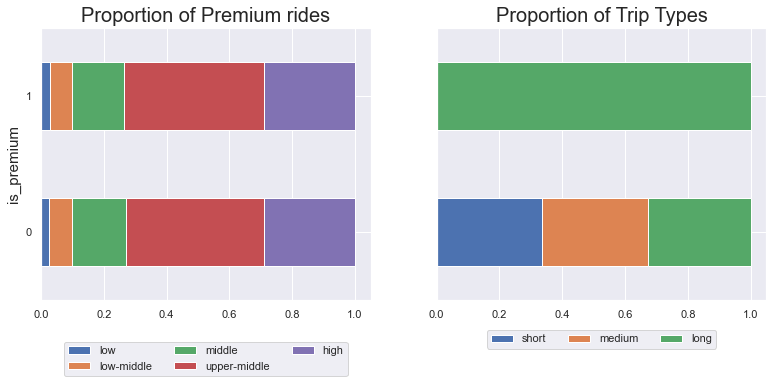

In [116]:
fig, ax = plt.subplots(1,2, sharey = True, figsize = (13,5))

pd.crosstab(index = full_df.is_premium, columns = full_df.income_levels, normalize = 'index').\
plot(kind = 'barh', stacked = True, title = "Proportion of Premium rides", ax = ax[0]).\
legend(loc = 'lower center', bbox_to_anchor = (0.5, -0.3), ncol = 3);

pd.crosstab(index = full_df.is_premium, columns = full_df.trip_type, normalize = 'index').\
plot(kind = 'barh', stacked = True, title = "Proportion of Trip Types", ax = ax[1]).\
legend(loc = 'lower center', bbox_to_anchor = (0.5, -0.2), ncol = 3);

For the `is_premum` variable, again my hypothesis for the premium cabs has been proven wrong as there is no association between is_premium variable with both distance and customer's income level. Therefore, I will drop this column.

From all of the above plots, we can conclude that customer's income level don't determine the Cab companies profit or mode of operation.

In [117]:
full_df.drop('is_premium', axis = 1, inplace = True)

##### Which Cab company has the most loyal customers?

In [118]:
loyal_cust = full_df.groupby(['customer_id', 'company']).size().reset_index().rename(columns = {0:'count'})

#identifying loyal customer's that has utilized a particular Cab company atleast 5 times.
loyal_cust['is_loyal_five'] = np.where(loyal_cust['count'] >= 5, 'Loyal', 'Not Loyal')

loyal_cust

customer_id     company  count is_loyal_five
0              1.0    Pink Cab      4     Not Loyal
1              1.0  Yellow Cab     24         Loyal
2              2.0    Pink Cab      4     Not Loyal
3              2.0  Yellow Cab     35         Loyal
4              3.0    Pink Cab      6         Loyal
...            ...         ...    ...           ...
71148      59998.0  Yellow Cab      6         Loyal
71149      59999.0    Pink Cab      2     Not Loyal
71150      59999.0  Yellow Cab      6         Loyal
71151      60000.0    Pink Cab      3     Not Loyal
71152      60000.0  Yellow Cab     11         Loyal

[71153 rows x 4 columns]

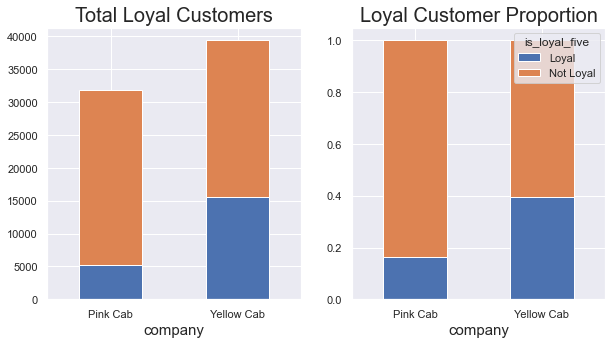

In [119]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

pd.crosstab(index = loyal_cust.company, columns = loyal_cust.is_loyal_five).\
plot(kind = 'bar', rot = 0, stacked = True, title = "Total Loyal Customers", ax = ax[0], legend = False);

pd.crosstab(index = loyal_cust.company, columns = loyal_cust.is_loyal_five, normalize = 'index').\
plot(kind = 'bar', rot = 0, stacked = True, title = "Loyal Customer Proportion", ax = ax[1]);

From the above plots, its clear that $\color{yellow}{\text{Yellow Cab}}$ customer's have more loyal customer's who has used the company's services at least 5 times compared to  $\color{violet}{\text{Pink Cab}}$ company.

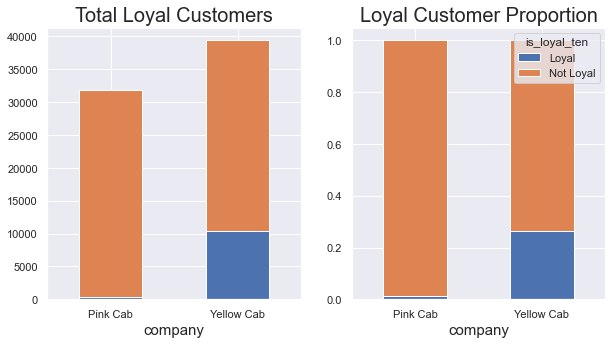

In [120]:
#identifying loyal customer's that has utilized a particular Cab company atleast 10 times.
loyal_cust['is_loyal_ten'] = np.where(loyal_cust['count'] >= 10, 'Loyal', 'Not Loyal')

fig, ax = plt.subplots(1,2, figsize = (10,5))

pd.crosstab(index = loyal_cust.company, columns = loyal_cust.is_loyal_ten).\
plot(kind = 'bar', rot = 0, stacked = True, title = "Total Loyal Customers", ax = ax[0], legend = False);

pd.crosstab(index = loyal_cust.company, columns = loyal_cust.is_loyal_ten, normalize = 'index').\
plot(kind = 'bar', rot = 0, stacked = True, title = "Loyal Customer Proportion", ax = ax[1]);

Same as before, $\color{yellow}{\text{Yellow Cab}}$ customer's have more loyal customer's who has used the company's services at least 10 times compared to  $\color{violet}{\text{Pink Cab}}$ company.

#### Customer growth by year

In [121]:
#Annual Customer growth by company

yearly_cust_growth = full_df.groupby(['city', 'year', 'company']).agg({'customer_id':'nunique'}).\
                                                                                    reset_index()

yearly_cust_growth

city  year     company  customer_id
0       ATLANTA  2016    Pink Cab          477
1       ATLANTA  2016  Yellow Cab         1321
2       ATLANTA  2017    Pink Cab          577
3       ATLANTA  2017  Yellow Cab         1518
4       ATLANTA  2018    Pink Cab          490
..          ...   ...         ...          ...
109  WASHINGTON  2016  Yellow Cab         2944
110  WASHINGTON  2017    Pink Cab         1059
111  WASHINGTON  2017  Yellow Cab         2966
112  WASHINGTON  2018    Pink Cab          940
113  WASHINGTON  2018  Yellow Cab         2937

[114 rows x 4 columns]

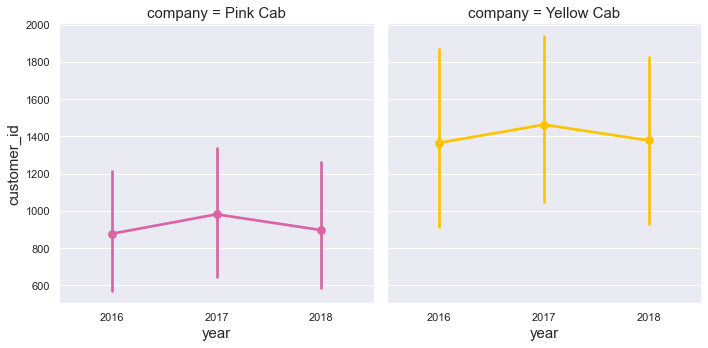

In [122]:
sns.catplot(y = 'customer_id', x = 'year', col = 'company', data = yearly_cust_growth, 
           kind = 'point', hue = 'company', palette = palette);

There was a slight growth of customer's from 2016 to 2017 but then lowered slightly from 2017 to 2018.

##### Preferred Payment Mode by Customers

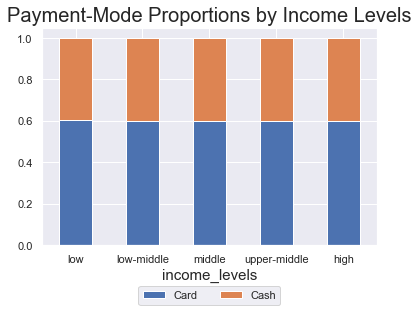

In [123]:
pd.crosstab(index = full_df.income_levels, columns = full_df.payment_mode, normalize = 'index').\
plot(kind = 'bar', stacked = True, rot = 0, title = "Payment-Mode Proportions by Income Levels").\
legend(loc = "lower center", ncol = 2, bbox_to_anchor=(0.5, -0.3));

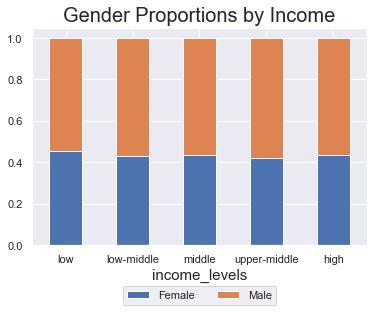

In [124]:
pd.crosstab(columns = full_df.gender, index = full_df.income_levels, normalize = 'index').\
plot(kind = 'bar', stacked = True, rot = 0, title = "Gender Proportions by Income").\
legend(loc = 'lower center', ncol = 2, bbox_to_anchor = (0.5, -0.3));

### Age

The age distribution of the passengers in the dataset follows a two-phase uniform distribution. According to the data, the highest number of passengers are between the age groups of 18 to 40 year olds. Older passengers above 40 until 65 still make up a sizable portion of passengers.

In [125]:
full_df['age_level'] = pd.qcut(full_df.age, 5, 
                               labels = ['early_20s', 'late_20s', 'early_30s', 'middle_age', 'senior'])

# early_20s: 17.999 to 24.0 
# late_20s: 24.0 to 30.0 
# early_30s: 30.0 to 36.0 
# middle_age: 36.0 to 47.0
# senior : 47.0 to 65.0

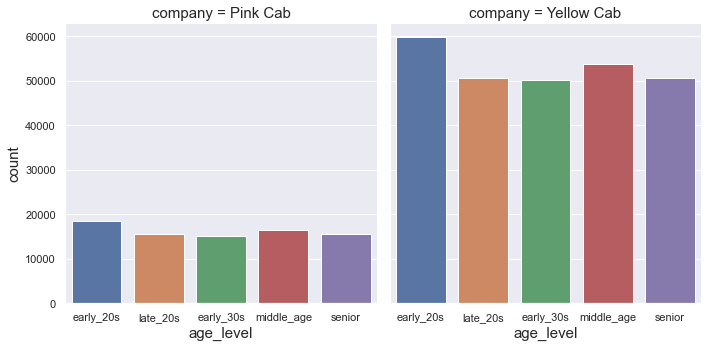

In [126]:
sns.catplot(x = 'age_level', col = 'company', data = full_df, kind = 'count');

$\color{yellow}{\text{Yellow Cab}}$ have higher number of customers, but the distribution of customers on an age level are the same for both companies.

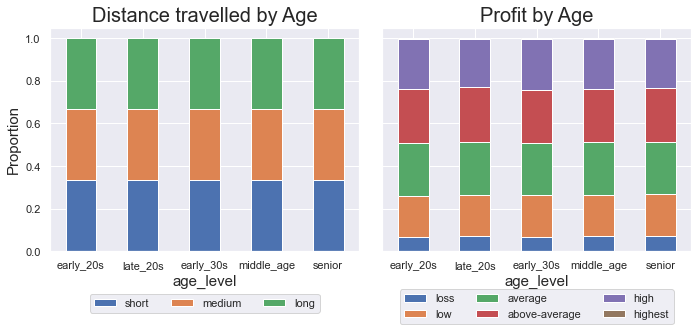

In [127]:
fig, ax = plt.subplots(1,2, figsize = (10,5), tight_layout = True, sharey = True)

pd.crosstab(index = full_df.age_level, columns = full_df.trip_type, normalize = 'index').\
plot(kind = 'bar', stacked = True, rot = 0, title = "Distance travelled by Age", 
     ylabel = "Proportion", ax = ax[0]).\
legend(loc = "lower center", bbox_to_anchor = (0.5,-0.3), ncol = 3);

pd.crosstab(index = full_df.age_level, columns = full_df.profit_level, normalize = 'index').\
plot(kind = 'bar', stacked = True, rot = 0, title = "Profit by Age", ax = ax[1]).\
legend(loc = "lower center", bbox_to_anchor = (0.5,-0.35), ncol = 3);

Customer's age doesn't seem to have any affect on both Distance traveled and Profit as the proportions remains the same across all age levels.

#### Market Share

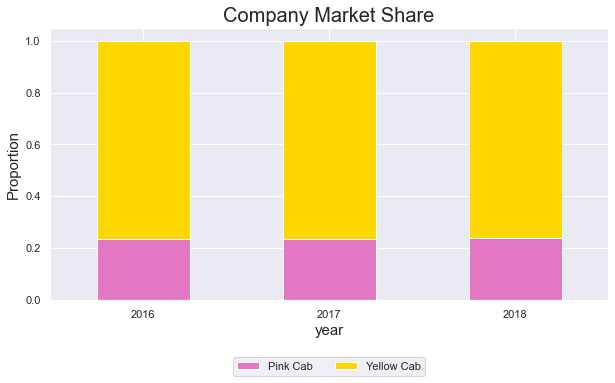

In [128]:
#MArket Share by company

pd.crosstab(index = full_df.year, columns = full_df.company, normalize = 'index').\
plot(kind = 'bar', stacked = True, rot = 0, title = 'Company Market Share', color = ['tab:pink', 'gold'], 
    figsize = (10, 5), ylabel = 'Proportion').\
legend(loc = 'lower center', ncol = 2, bbox_to_anchor = (0.5, -0.3));

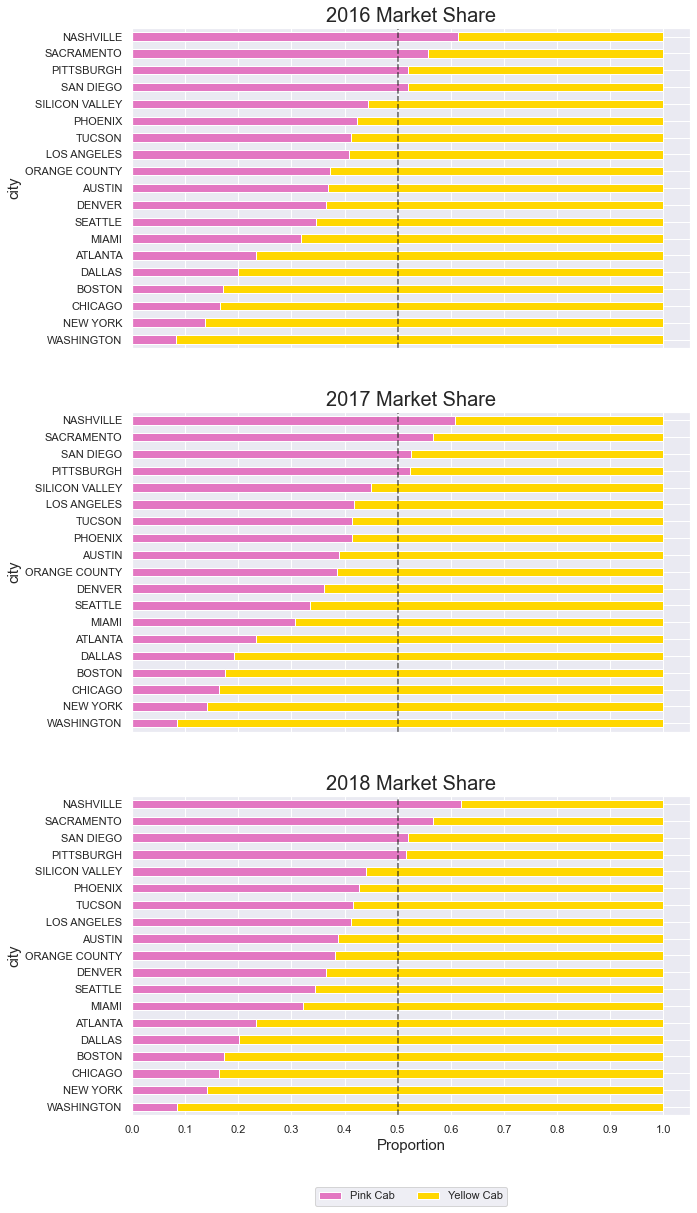

In [129]:
fig, axes = plt.subplots(3,1, sharex = True, figsize = (10,20))

for year, ax in zip([2016, 2017, 2018], axes.flatten()):
    temp_df = full_df.query(f'year == {year}')
    pd.crosstab(index=temp_df.city, columns=temp_df.company, normalize='index').sort_values('Pink Cab').\
    plot(kind = 'barh', stacked = True, ax = ax, title = f"{year} Market Share", 
        color = ['tab:pink', 'gold']).\
    legend(loc = 'lower center', ncol = 2, bbox_to_anchor = (0.5, -0.3))
    
    ax.axvline(0.5, ls = '--', color = 'k', alpha = 0.7)
    
plt.xlabel("Proportion");
plt.xticks(np.arange(0.0, 1.1, 0.1));

Across all the years, the market share for each company has not changed much. 

$\color{yellow}{\text{Yellow Cab}}$ has the highest market share across majority of the cities.

#### Does `price_charged` vary by Gender?

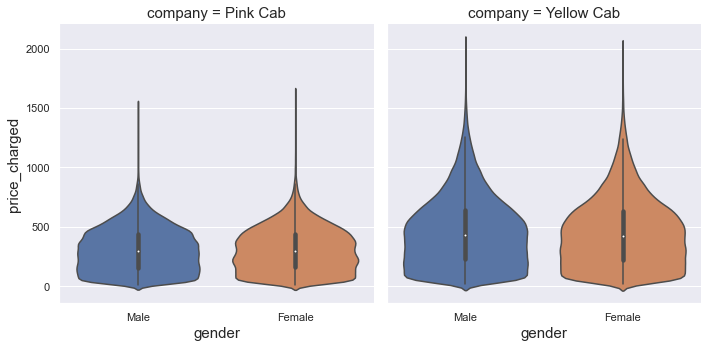

In [130]:
sns.catplot(x = 'gender', y = 'price_charged', data = full_df, col = 'company', kind = 'violin');

For both cab companies, the median price_charged for both gender's are very similar. Therefore there is no relation between price_charged and gender.

# Conclusion

After analyzing all the variables in the dataset, here is a summary of my analysis:
<br>
* Both Cab company's financial performance is mainly based on **profit**. Profit is derived from the difference of the **price charged** and **cost of trip** for each trip. Both of these variables are highly correlated with the **distance traveled** for each trip. And the total distance traveled in a day is positively correlated with **total number of daily trips**. 
<br>
<br>
* There is **weekly, monthly and quarterly seasonality** on the number of rides in a given time period. The number of cab rides are higher during December and at their lowest during February.  
<br>
<br>
*  $\color{yellow}{\text{Yellow Cab}}$ has higher coverage on cities and has higher loyal customers compared to $\color{violet}{\text{Pink Cab}}$. Moreover, $\color{yellow}{\text{Yellow Cab}}$ seems to perform well almost on all cities and is able to make significantly higher profits compared to it's rival.
<br>

#### In conclusion, we can measure a company's performance by looking at the total number of daily trips.

In the next section, I will include extra datasets with the full dataset to see other factors that can affect both company's mode of operations.

### Holidays vs Trips

In [132]:
holiday_df = pd.read_csv("datasets/USholidays.csv").\
             query('Date >= "2016-01-01" & Date <= "2018-12-31"').\
             sort_values('Date').reset_index(drop = True)

holiday_df.head()

Date                      Holiday WeekDay  Month  Day  Year
0  2016-01-01               New Year's Day  Friday      1    1  2016
1  2016-01-18  Martin Luther King, Jr. Day  Monday      1   18  2016
2  2016-02-14              Valentine’s Day  Sunday      2   14  2016
3  2016-02-15        Washington's Birthday  Monday      2   15  2016
4  2016-03-27               Western Easter  Sunday      3   27  2016

In [133]:
holiday_df.Date = pd.to_datetime(holiday_df.Date)
holiday_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     57 non-null     datetime64[ns]
 1   Holiday  57 non-null     object        
 2   WeekDay  57 non-null     object        
 3   Month    57 non-null     int64         
 4   Day      57 non-null     int64         
 5   Year     57 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 2.8+ KB


In [134]:
#Holidays are 1, non-holidays = 0

full_df['is_holiday'] = np.where(full_df['travel_date'].isin(holiday_df.Date), 1, 0)

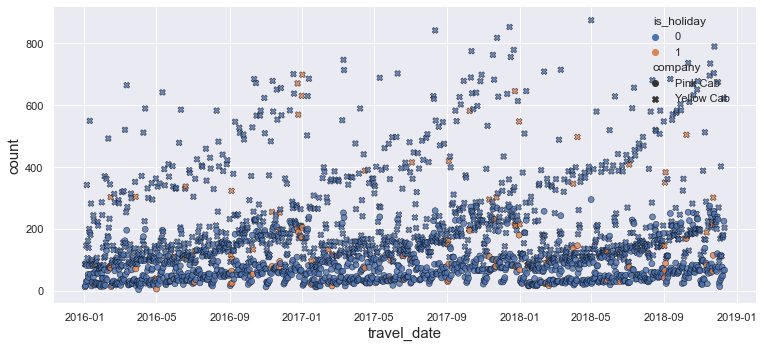

In [135]:
holiday_trip = full_df.groupby(['travel_date', 'company', 'is_holiday']).size().reset_index().\
               rename(columns = {0:'count'})

# plt.figure(figsize = (25,8));
g = sns.relplot(x = 'travel_date', y = 'count', hue = 'is_holiday', style = 'company', 
            data = holiday_trip, edgecolor="black", aspect = 1.9, height = 5, alpha = 0.8);

g._legend.set_bbox_to_anchor((0.95, 0.8))
plt.tight_layout();

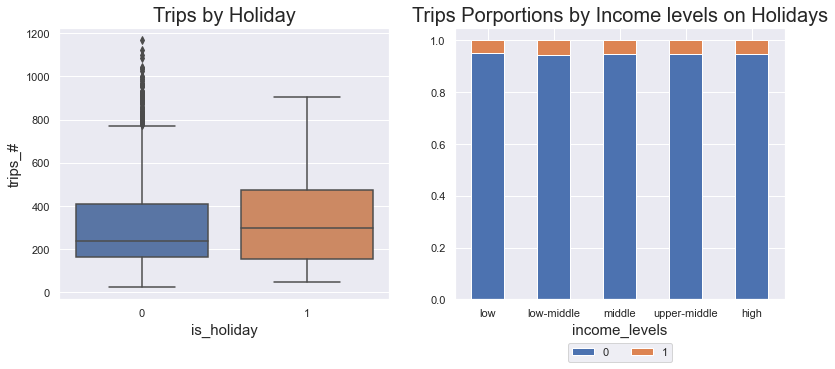

In [136]:
trip_holiday = full_df.groupby(['travel_date', 'is_holiday']).\
                   size().reset_index().rename(columns = {0:'trips_#'})

fig, ax = plt.subplots(1,2, figsize = (13,5))

sns.boxplot(x = 'is_holiday', y = 'trips_#', data = trip_holiday, ax = ax[0]).\
set_title('Trips by Holiday');

pd.crosstab(index = full_df.income_levels, columns = full_df.is_holiday, normalize = 'index').\
plot(kind='bar', stacked=True, title='Trips Porportions by Income levels on Holidays', ax=ax[1], rot = 0).\
legend(loc = 'lower center', bbox_to_anchor = (0.5,-0.25), ncol = 2);

The above plot shows that the number of trips done on both types of days are heavily skewed to the right. Also, customer's of all income levels have same proportions across levels for the number of trips they make on holidays and non-holidays.
<br>
<br>
The median number of trips for both categories seems almost equal. But we need to test this statistically in order to establish an association between number of trips and type of holiday.
<br>
<br>
Similar to earlier, I will employ Kruskal-Wallis H-test to test for association between type of day and number of trips.

#### Is there an association between number of trips traveled on both holidays and non-holidays?

#### **Kruskal-Wallis H-test**
<br>

##### Null hypothesis (H0) : Median number of trips are the same for both types of Days.

##### Alternative Hypothesis (H1): Median number of trips are different for both holidays.

In [137]:
from scipy import stats

a = holiday_trip.query('is_holiday == 0')['count'].values # not holiday trips
b = holiday_trip.query('is_holiday == 1')['count'].values # holiday trips

h, p = stats.kruskal(a, b)

print(f'H-Value: {h:.3f}')
print(f'P-value: {p:.3f}')
print()

alpha = 0.05

if p <= alpha:
    print('P-value less than alpha - Reject H0')
else:
    print('P-value higher than alpha - Cannot Reject H0')

H-Value: 0.387
P-value: 0.534

P-value higher than alpha - Cannot Reject H0


As the P-value is higher than the set alpha level, **we can conclude that holidays does not cause any increase or decrease in daily number of trips**.